*ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒØŒ∑œÉŒ± **3** Free Pass*

---
<span style="font-size: 28px;">**ŒïœÅœéœÑŒ∑œÉŒ∑ 2**</span>

---
<span style="font-size: 20px;">**Œ¶œåœÅœÑœâœÉŒ∑ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ**</span>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


data = pd.read_csv('cell_phone_ratings.csv')

print(data)

           reviewerID        asin  overall
0       AJMBX04BZWPSD  B0000SX3BK        1
1       AJMBX04BZWPSD  B0000SX3BK        1
2       AGZ8HQO485IL8  B0000SX3BK        3
3       AGZ8HQO485IL8  B0000SX3BK        3
4      A38V5H082VI1H4  B0000SX3BK        4
...               ...         ...      ...
47989  A233H7F8EJIX1F  B00ONSC81E        5
47990   A10WMKOL27VEI  B00ONSC81E        5
47991  A1TP2RW7KDI5AZ  B00ONSC81E        5
47992  A3KK47W2XBVVUJ  B00ONSC81E        5
47993  A1W8X41DAROPQ6  B00ONSC81E        5

[47994 rows x 3 columns]


---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 1**</span>

In [2]:
# ŒïœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œå Œ∫ŒªŒ¨Œ¥ŒµŒºŒ± Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒµœÄŒµŒæŒµœÅŒ≥Œ±œÉŒØŒ± œÑœâŒΩ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ
while True:
    # ŒöŒ±œÑŒ±ŒºŒ≠œÑœÅŒ∑œÉŒ∑ œÑŒøœÖ Œ±œÅŒπŒ∏ŒºŒøœç Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ Œ±ŒΩŒ¨ œáœÅŒÆœÉœÑŒ∑ Œ∫Œ±Œπ Œ±ŒΩŒ¨ Œ∫ŒπŒΩŒ∑œÑœå
    user_counts = data['reviewerID'].value_counts()
    item_counts = data['asin'].value_counts()

    # Œ¶ŒπŒªœÑœÅŒ¨œÅŒπœÉŒºŒ± œáœÅŒ∑œÉœÑœéŒΩ Œ∫Œ±Œπ Œ∫ŒπŒΩŒ∑œÑœéŒΩ œÄŒøœÖ Œ¥ŒµŒΩ ŒπŒ∫Œ±ŒΩŒøœÄŒøŒπŒøœçŒΩ œÑŒ∑ŒΩ œÉœÖŒΩŒ∏ŒÆŒ∫Œ∑
    filtered_users = user_counts[user_counts > 5].index
    filtered_items = item_counts[item_counts > 5].index

    filtered_data = data[(data['reviewerID'].isin(filtered_users)) & (data['asin'].isin(filtered_items))]
    #print(filtered_data)

    new_user_counts = filtered_data['reviewerID'].value_counts()
    new_item_counts = filtered_data['asin'].value_counts()
    #print(new_user_counts)
    #print(new_item_counts)

    # ŒëŒΩ œÑŒø œÑŒµŒªŒµœÖŒ±œÑŒ±ŒØŒø œÉœÑŒøŒπœáŒµŒØŒø œÑŒ∑œÇ Œ∫Œ±œÑŒ±ŒºŒ≠œÑœÅŒ∑œÉŒ∑œÇ œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ Œ∫Œ±Œπ œÑœâŒΩ Œ∫ŒπŒΩŒ∑œÑœéŒΩ œÉœÑŒ± Œ∫Œ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ± ŒºŒ±œÇ data ŒµŒØŒΩŒ±Œπ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒ± Œ±œÄœå 5
    if new_user_counts.iloc[-1] > 5 and new_item_counts.iloc[-1] > 5:
        # Œ§œåœÑŒµ Œ∏Œ± œÉœÑŒ±ŒºŒ±œÑŒÆœÉŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒµœÄŒ±ŒΩŒ¨ŒªŒ∑œàŒ∑
        break
    else:
        # ŒëŒªŒªŒπœéœÇ Œ∏Œ≠œÑŒøœÖŒºŒµ œÉœÑŒø œÄŒ±ŒªŒπœå ŒºŒ±œÇ data, œÑŒ± Œ∫Œ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ± ŒºŒ±œÇ œÄœÅŒøœÉœâœÅŒπŒΩŒ¨ data
        data = filtered_data

In [3]:
print(filtered_data)
print(filtered_data['reviewerID'].value_counts())
print(filtered_data['asin'].value_counts())

           reviewerID        asin  overall
887     ASK11J3ZXE42J  B0016JDBYG        2
893    A39Y702EFQOVNG  B0016JDBYG        5
911     AHIY1S8OE0JAE  B0016JDBYG        3
961     ASK11J3ZXE42J  B0016JDBYG        2
967    A39Y702EFQOVNG  B0016JDBYG        5
...               ...         ...      ...
46962  A2R6U7WLNVSIJL  B01F57V826        5
46977  A3UHUP814K2GVU  B01F57V826        5
46982  A2RJB9YB8059OJ  B01F57V826        4
47007  A214JQI91IH3S1  B01F57V826        5
47010  A1QPLMB8S5KZDD  B01F57V826        5

[2969 rows x 3 columns]
reviewerID
A1RNVKFD1PF1QF    21
ABIWW6V0V01L6     20
AJSDV5OVPZ7Y3     19
A3U1J3Z55AFZZO    17
AUGGOB99VRU6U     16
                  ..
A3VJ27IYOG4BDB     6
AVSJ4U3W2V0SP      6
A1HJSE311DIDRK     6
A2N47GVERJ9HY1     6
A2R6U7WLNVSIJL     6
Name: count, Length: 389, dtype: int64
asin
B00GXHPN1U    136
B00A29WCA0    122
B00DRNEV9S     81
B00LLP508U     69
B00I2LRLPG     56
             ... 
B00IV5C0T0      6
B00IVI3H2Q      6
B00J99NFZK      6
B00KCTWUIE 

---
**ŒµŒ¥œé œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÜŒ±ŒØŒΩŒµœÑŒ±Œπ Œ∑ Œ±œÄœåŒ¥ŒµŒπŒæŒ∑ œåœÑŒπ Œ≠œáŒµŒπ Œ≥ŒØŒΩŒµŒπ œÉœâœÉœÑŒ¨ œÑŒø Œ∫ŒªŒ¨Œ¥ŒµŒºŒ±, Œ±œÜŒøœç œÑŒø œÉœÖŒ≥Œ∫œÅŒØŒΩŒøœÖŒºŒµ ŒºŒµ œÑŒ± œÉœâœÉœÑŒ¨ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± œÄŒøœÖ ŒºŒ±œÇ Œ≠œáŒøœÖŒΩ Œ¥œâŒ∏ŒµŒØ Œ±œÄœå œÑŒø Œ±œÅœáŒµŒØŒø *cell_phone_ratings_pruned.csv***

In [4]:
pruned_data = pd.read_csv('cell_phone_ratings_pruned.csv')

print(pruned_data)
print(pruned_data['reviewerID'].value_counts())
print(pruned_data['asin'].value_counts())

          reviewerID        asin  overall
0      ASK11J3ZXE42J  B0016JDBYG        2
1     A39Y702EFQOVNG  B0016JDBYG        5
2      AHIY1S8OE0JAE  B0016JDBYG        3
3      ASK11J3ZXE42J  B0016JDBYG        2
4     A39Y702EFQOVNG  B0016JDBYG        5
...              ...         ...      ...
2964  A2R6U7WLNVSIJL  B01F57V826        5
2965  A3UHUP814K2GVU  B01F57V826        5
2966  A2RJB9YB8059OJ  B01F57V826        4
2967  A214JQI91IH3S1  B01F57V826        5
2968  A1QPLMB8S5KZDD  B01F57V826        5

[2969 rows x 3 columns]
reviewerID
A1RNVKFD1PF1QF    21
ABIWW6V0V01L6     20
AJSDV5OVPZ7Y3     19
A3U1J3Z55AFZZO    17
AUGGOB99VRU6U     16
                  ..
A3VJ27IYOG4BDB     6
AVSJ4U3W2V0SP      6
A1HJSE311DIDRK     6
A2N47GVERJ9HY1     6
A2R6U7WLNVSIJL     6
Name: count, Length: 389, dtype: int64
asin
B00GXHPN1U    136
B00A29WCA0    122
B00DRNEV9S     81
B00LLP508U     69
B00I2LRLPG     56
             ... 
B00IV5C0T0      6
B00IVI3H2Q      6
B00J99NFZK      6
B00KCTWUIE      6
B00F3

In [5]:
filtered_data_reset = filtered_data.reset_index(drop=True)
are_equal = filtered_data_reset.equals(pruned_data)
print(are_equal)

True


---
**ŒµŒ¥œé œÜœÑŒπŒ¨œáŒΩŒøœÖŒºŒµ œÑŒø train Œ∫Œ±Œπ œÑŒø test set**

In [6]:
# Œ§œÖœáŒ±ŒØŒ± ŒµœÄŒπŒªŒøŒ≥ŒÆ 10% œÑŒøœÖ test set
test_size = round(0.1 * len(filtered_data))
test_indices = np.random.choice(filtered_data.index, size=test_size, replace=False)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑœâŒΩ Œ¥ŒπŒ∫œéŒΩ ŒºŒøœÖ train Œ∫Œ±Œπ test sets
train_data_mine = filtered_data.drop(test_indices)
test_data_mine = filtered_data.loc[test_indices]

print(train_data_mine)
print(test_data_mine)

           reviewerID        asin  overall
887     ASK11J3ZXE42J  B0016JDBYG        2
893    A39Y702EFQOVNG  B0016JDBYG        5
911     AHIY1S8OE0JAE  B0016JDBYG        3
961     ASK11J3ZXE42J  B0016JDBYG        2
967    A39Y702EFQOVNG  B0016JDBYG        5
...               ...         ...      ...
46960  A242ADDCE3YB3U  B01F57V826        1
46977  A3UHUP814K2GVU  B01F57V826        5
46982  A2RJB9YB8059OJ  B01F57V826        4
47007  A214JQI91IH3S1  B01F57V826        5
47010  A1QPLMB8S5KZDD  B01F57V826        5

[2672 rows x 3 columns]
           reviewerID        asin  overall
1885   A1601RU0RU6L9N  B001V7RK8G        5
2390    ATWDCYVND935I  B0034THXTK        5
21443  A2U44VA0G6MNOI  B00GP6TEYQ        5
29087   AYYOB060VR9GM  B00LUZ8XFS        5
6511    AX4PXKR06TGLP  B005LSS3L4        5
...               ...         ...      ...
22271   AMOLUSI1RUF0B  B00GXHPN1U        5
11899   AF54V9D0YCQ2I  B00A29WCA0        5
46529  A1U05R25DGZ2L1  B01EYT1URO        5
8527   A3O3V7DXDN2EQH  B0078L

**œåŒºœâœÇ Œ≥ŒπŒ± ŒªœåŒ≥ŒøœÖœÇ ŒµœÖŒ∫ŒøŒªŒØŒ±œÇ œÉœÑŒ∑ŒΩ Œ¥ŒπœåœÅŒ∏œâœÉŒ∑, ŒºŒ±œÇ Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œÑŒ± Œ≠œÑŒøŒπŒºŒ± Œ±œÅœáŒµŒØŒ± train.csv Œ∫Œ±Œπ test.csv**</br>
Œ¨œÅŒ± Œ±œÄœå ŒµŒ¥œé Œ∫Œ±Œπ œÄŒ≠œÅŒ± Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ Œ±œÖœÑŒ¨:

In [7]:
train_data = pd.read_csv('ratings_train.csv')
test_data = pd.read_csv('ratings_test.csv')

print(train_data)
print(test_data)

          reviewerID        asin  overall
0     A1KHGZDTNXCOW9  B0085EIE38        5
1      ATWDCYVND935I  B001F7VN6M        5
2      AO84KHY4RD89J  B00F3J4B5S        5
3     A2F2KL35PTQ8BS  B00LUZ8XFS        1
4     A1GNL6V10GUU3B  B008MC3N34        5
...              ...         ...      ...
2667  A2V36ZOEXQV8UM  B00INEIZN4        5
2668  A1M9J5T8PRI2H8  B00COZIZ10        5
2669  A16OQXVU832Q66  B004748YPS        5
2670   AP0HMWC3KIUN0  B00FJBFTDS        5
2671    A908CRZDXABQ  B00F64LD4W        4

[2672 rows x 3 columns]
         reviewerID        asin  overall
0     ADKRA9ZAFYRVW  B00JK3DX8Y        5
1    A3UHUP814K2GVU  B00C1DIGRI        5
2    A3477O7Y026ARP  B00AKG2XSQ        5
3    A1L08O60MXPCYA  B0034TZONM        5
4     A2EMA184DPM05  B001F7VN6M        5
..              ...         ...      ...
292  A2KJX3K63I3K0U  B00F64LD4W        5
293  A23DH5K5KDCJCK  B00LLP508U        5
294   AIH05X9KBQWX4  B00915VL58        3
295  A3VJ27IYOG4BDB  B00GXHPN1U        5
296  A2HDF4JWLGDYHP 

---
**ŒµŒ¥œé œÖŒªŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± œÑŒøŒΩ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºœå œÑŒøœÖ error**</br>
ŒµŒØœÑŒµ ŒºœÄŒøœÅŒøœçŒºŒµ ŒºŒµ Œ≠œÑŒøŒπŒºŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑, ŒµŒØœÑŒµ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœåŒΩœÑŒ±œÇ œÑŒøŒΩ œÑœçœÄŒø

In [8]:
def calculate_rmse(actual_ratings, predicted_ratings):
    rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    
    # OR
    
    #n = len(actual_ratings)
    #rmse = np.sqrt(np.sum((actual_ratings - predicted_ratings) ** 2) / n)
    
    return rmse

---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 2**</span>

**ŒëœÖœÑœå Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ Œ±ŒΩŒ±Œ≥Œ∫Œ±ŒØŒø ŒΩŒ± ŒµŒªŒµŒ≥œáŒ∏ŒµŒØ Œ±ŒªŒªŒ¨ ŒÆŒ∏ŒµŒªŒ± ŒΩŒ± Œ¥œâ Œ±ŒΩ ŒøŒπ œáœÅŒÆœÉœÑŒµœÇ Œ∫Œ±Œπ œÑŒ± Œ∫ŒπŒΩŒ∑œÑŒ¨ œÄŒøœÖ ŒµŒØŒΩŒ±Œπ œÉœÑŒø train œÄŒµœÅŒπŒ≠œáŒøŒΩœÑŒ±Œπ Œ∫Œ¨œÄŒøŒπŒ± Œ±œÄœå Œ±œÖœÑŒ¨ Œ∫Œ±Œπ œÉœÑŒø test(Œ∏Œ≠Œªœâ œÉœÑŒø test ŒΩŒ± Œ≠œáŒøœÖŒºŒµ œáœÅŒÆœÉœÑŒµœÇ Œ∫Œ±Œπ Œ∫ŒπŒΩŒ∑œÑŒ¨ œÄŒøœÖ ŒΩŒ± ŒµŒØŒΩŒ±Œπ Œ∫Œ±œÄŒøœÖ Œ∫Œ±Œπ œÉœÑŒø train, *Œ¥ŒµŒΩ ŒºŒµ ŒµŒΩŒ¥ŒπŒ±œÜŒ≠œÅŒµŒπ ŒΩŒ± Œ≠œáœâ œÑŒø ŒØŒ¥ŒπŒø Œ∂ŒµœÖŒ≥Œ¨œÅŒπ*)(Œ∫Œ±Œπ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œåœÑŒπ Œ±œÖœÑœå Œ±ŒªŒ∑Œ∏ŒµœçŒµŒπ Œ¨œÅŒ± Œ∏Œ± ŒºœÄŒøœÅœé ŒΩŒ± Œ∫Œ¨ŒΩœâ Œ∫Œ¨œÄŒøŒπŒµœÇ œÉœÖŒºŒ≤Œ¨œÉŒµŒπœÇ Œ±œÅŒ≥œåœÑŒµœÅŒ±)**

In [9]:
# Check if all values in column 'reviewerID' of test_data are in column 'reviewerID' of train_data
is_in_train_data = test_data['reviewerID'].isin(train_data['reviewerID']).all()
print(is_in_train_data)

is_in_train_data = test_data['asin'].isin(train_data['asin']).all()
print(is_in_train_data)

True
True


In [10]:
# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ User Average
user_avg_ratings = train_data.groupby('reviewerID')['overall'].mean()

# Œ†œÅœåŒ≤ŒªŒµœàŒ∑ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒø User Average
test_data_UA_predictions = test_data.copy()
test_data_UA_predictions['overall_prediction'] = test_data['reviewerID'].map(user_avg_ratings)
print("----------User-Average----------")
print(user_avg_ratings)
print(test_data_UA_predictions)
print()

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ Item Average
item_avg_ratings = train_data.groupby('asin')['overall'].mean()

# Œ†œÅœåŒ≤ŒªŒµœàŒ∑ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒø Item Average
test_data_IA_predictions = test_data.copy()
test_data_IA_predictions['overall_prediction'] = test_data['asin'].map(item_avg_ratings)
print("----------Item-Average----------")
print(item_avg_ratings)
print(test_data_IA_predictions)

----------User-Average----------
reviewerID
A10DTOWMTN6VC8    5.000000
A10F15DU5XF86H    5.000000
A10J1NIBCBVEW1    5.000000
A10OJXPDFE0GOK    5.000000
A1134GV44SWB4N    5.000000
                    ...   
AYDLETEYQFTDE     4.857143
AYTWUDQ3SYR5V     4.333333
AYYOB060VR9GM     5.000000
AZ4PIH3RF6U5D     4.333333
AZD8GF72O1T26     4.166667
Name: overall, Length: 389, dtype: float64
         reviewerID        asin  overall  overall_prediction
0     ADKRA9ZAFYRVW  B00JK3DX8Y        5            5.000000
1    A3UHUP814K2GVU  B00C1DIGRI        5            5.000000
2    A3477O7Y026ARP  B00AKG2XSQ        5            5.000000
3    A1L08O60MXPCYA  B0034TZONM        5            5.000000
4     A2EMA184DPM05  B001F7VN6M        5            5.000000
..              ...         ...      ...                 ...
292  A2KJX3K63I3K0U  B00F64LD4W        5            5.000000
293  A23DH5K5KDCJCK  B00LLP508U        5            5.000000
294   AIH05X9KBQWX4  B00915VL58        3            3.600000
295  A

In [11]:
# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÑŒøœÖ RMSE
ua_rmse = calculate_rmse(test_data['overall'], test_data_UA_predictions['overall_prediction'])
print("RMSE [UA]:", ua_rmse)

ia_rmse = calculate_rmse(test_data['overall'], test_data_IA_predictions['overall_prediction'])
print("RMSE [IA]:", ia_rmse)

RMSE [UA]: 0.5397865558697561
RMSE [IA]: 0.5138120657943773


---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 3**</span>

In [12]:
# ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆ Œ±œÅŒ±ŒπŒøœç œÄŒØŒΩŒ±Œ∫Œ± R
users = train_data['reviewerID'].unique()
cellphones = train_data['asin'].unique()

user_mapping = {user: i for i, user in enumerate(users)}
cellphone_mapping = {cellphone: i for i, cellphone in enumerate(cellphones)}

num_users = len(users)
print(num_users)
num_cellphones = len(cellphones)
print(num_cellphones)

R = np.zeros((num_users, num_cellphones))

for index, row in train_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]
    rating = row['overall']
    R[u, c] = rating

# ŒïŒ∫œÑŒ≠ŒªŒµœÉŒ∑ SVD Œ≥ŒπŒ± K = 20
K = 20
U, Sigma, VT = np.linalg.svd(R)

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ rank-20 approximation œÄŒØŒΩŒ±Œ∫Œ±
U_20 = U[:, :K]                # œåŒªŒµœÇ œÑŒπœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ, œÑŒπœÇ 20 œÄœÅœéœÑŒµœÇ œÉœÑŒÆŒªŒµœÇ
Sigma_20 = np.diag(Sigma[:K])  # œÑŒπœÇ œÄœÅœéœÑŒµœÇ 20 œÑŒπŒºŒ≠œÇ œÑŒ∑œÇ Œ¥ŒπŒ±Œ≥œâŒΩŒØŒøœÖ
VT_20 = VT[:K, :]              # œÑŒπœÇ 20 œÄœÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ, œåŒªŒµœÇ œÑŒπœÇ œÉœÑŒÆŒªŒµœÇ

# ŒïŒîŒ© ŒúŒ†ŒüŒ°ŒüŒ•ŒúŒï ŒùŒë Œ¶Œ§ŒôŒëŒûŒüŒ•ŒúŒï Œ§ŒüŒù Œ†Œ•ŒöŒùŒü Œ†ŒôŒùŒëŒöŒë, ŒëŒõŒõŒë Œó ŒïŒöŒ¶Œ©ŒùŒóŒ£Œó Œ§ŒüŒ• PDF ŒúŒëŒ£ ŒõŒïŒïŒô ŒùŒë ŒúŒóŒù Œ§Œü ŒöŒëŒùŒüŒ•ŒúŒï
# Œ£Œï Œ£ŒßŒüŒõŒôŒë ŒïŒßŒïŒô ŒìŒôŒùŒïŒô ŒëŒ•Œ§Œó Œó ŒîŒôŒëŒîŒôŒöŒëŒ£ŒôŒë, ŒëŒõŒõŒë ŒìŒô ŒëŒ•Œ§Œü ŒïŒßŒïŒô ŒúŒ†ŒïŒô Œ£Œï Œ£ŒßŒüŒõŒôŒë, ŒìŒôŒëŒ§Œô ŒîŒïŒù ŒßŒ°ŒïŒôŒëŒñŒïŒ§ŒëŒô.
# ŒïŒìŒôŒùŒï ŒúŒüŒùŒü ŒõŒüŒìŒ© Œ†ŒïŒ°ŒôŒïŒ°ŒìŒïŒôŒëŒ£
### R_20 = np.dot(U_20, np.dot(Sigma_20, VT_20))

# "Clip" œÑŒπœÇ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ œÉŒµ ŒµœçœÅŒøœÇ [0, 5]
### R_20 = np.clip(R_20, 0, 5)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ Œ±œÅœáŒπŒ∫Œøœç œÄŒØŒΩŒ±Œ∫Œ±
print("Initial (R):")
print(R)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ rank-20 approximation œÄŒØŒΩŒ±Œ∫Œ±
### print("Rank-20 Approximation (R_20):")
### print(R_20)

389
177
Initial (R):
[[5. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Œ±œÜŒøœç ŒºŒ±œÇ Œ∂Œ∑œÑŒÆœÑŒµ ŒΩŒ± ŒºŒ∑ŒΩ œÜœÑŒπŒ¨ŒæŒøœÖŒºŒµ œÄœÖŒ∫ŒΩœå œÄŒØŒΩŒ±Œ∫Œ±, Œ∏Œ± Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉŒøœÖŒºŒµ œÑŒ∑ŒΩ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒØŒ±**</br>
Œ±œÅœáŒπŒ∫Œ¨ œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ ŒæŒµœáœâœÅŒπœÉœÑŒ¨ Œ≥ŒπŒ± K=20 œåœÄœâœÇ ŒºŒ±œÇ Œ∂Œ∑œÑŒÆŒ∏Œ∑Œ∫Œµ Œ∫Œ±Œπ Œ≠œÄŒµŒπœÑŒ± Œ∏Œ± œÖœÄŒøŒªŒøŒ≥ŒØœÉŒøœÖŒºŒµ œåŒªŒø œÑŒø ŒµœçœÅŒøœÇ [1-20]

In [13]:
predicted_ratings = []

for index, row in test_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]

    # ŒëœÄœå œÑŒ∑ŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ Œ¨ŒªŒ≥ŒµŒ≤œÅŒ± Œ≥ŒΩœâœÅŒØŒ∂ŒøœÖŒºŒµ œåœÑŒπ Œ≠œáŒµŒπ œÉŒ∑ŒºŒ±œÉŒØŒ± Œ∑ œÉŒµŒπœÅŒ¨ ŒºŒµ œÑŒ∑ŒΩ ŒøœÄŒøŒØŒ± Œ∫Œ¨ŒΩŒøœÖŒºŒµ œÑŒπœÇ œÄœÅŒ¨ŒæŒµŒπœÇ,
    # Œ∫Œ±Œπ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒæŒµŒ∫ŒπŒΩŒÆœÉŒøœÖŒºŒµ œÑŒøœÖœÇ œÄŒøŒªŒªŒ±œÄŒªŒ±œÉŒπŒ±œÉŒºŒøœçœÇ Œ±œÄœå œÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø Œ∂ŒµœÖŒ≥Œ¨œÅŒπ
    R_K_i = np.dot(U_20[u, :], np.dot(Sigma_20, VT_20[:, c]))
    predicted_ratings.append(R_K_i)

actual_ratings = test_data['overall'].values
#print(actual_ratings)
predicted_ratings = np.clip(predicted_ratings, 0, 5)
#print(predicted_ratings)

svd_20_rmse = calculate_rmse(actual_ratings, predicted_ratings)
print("RMSE-k20 [SVD]:", svd_20_rmse)

RMSE-k20 [SVD]: 4.640379315122203


œÑŒø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k: 1
ŒºŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [SVD]: 4.585271738477795


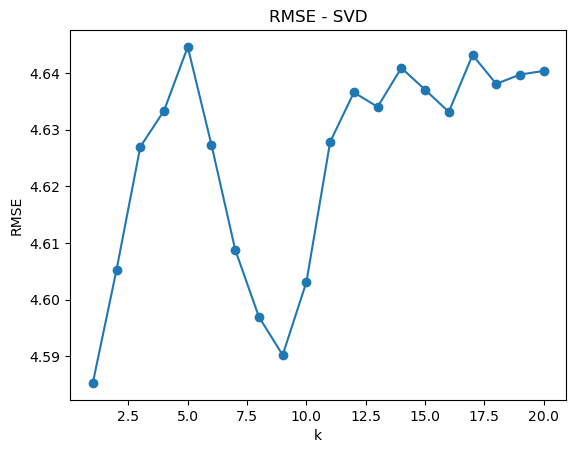

In [14]:
# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ k Œ±œÄœå œÑŒø 1 Œ≠œâœÇ œÑŒø 20
# ŒúŒµ œÄŒ±œÅœåŒºŒøŒπŒø œÑœÅœåœÄŒø Œ∏Œ± ŒµœÅŒ≥Œ±œÉœÑŒøœçŒºŒµ Œ∫Œ±Œπ ŒµŒ¥œé, œåœÄœâœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ
rmse_values = []
for k in range(1, K+1):
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    VT_k = VT[:k, :]
    
    predicted_ratings = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        # ŒëœÄœå œÑŒ∑ŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ Œ¨ŒªŒ≥ŒµŒ≤œÅŒ± Œ≥ŒΩœâœÅŒØŒ∂ŒøœÖŒºŒµ œåœÑŒπ Œ≠œáŒµŒπ œÉŒ∑ŒºŒ±œÉŒØŒ± Œ∑ œÉŒµŒπœÅŒ¨ ŒºŒµ œÑŒ∑ŒΩ ŒøœÄŒøŒØŒ± Œ∫Œ¨ŒΩŒøœÖŒºŒµ œÑŒπœÇ œÄœÅŒ¨ŒæŒµŒπœÇ,
        # Œ∫Œ±Œπ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒæŒµŒ∫ŒπŒΩŒÆœÉŒøœÖŒºŒµ œÑŒøœÖœÇ œÄŒøŒªŒªŒ±œÄŒªŒ±œÉŒπŒ±œÉŒºŒøœçœÇ Œ±œÄœå œÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø Œ∂ŒµœÖŒ≥Œ¨œÅŒπ
        R_K_i = np.dot(U_k[u, :], np.dot(Sigma_k, VT_k[:, c]))
        predicted_ratings.append(R_K_i)

    actual_ratings = test_data['overall'].values
    predicted_ratings = np.clip(predicted_ratings, 0, 5)

    svd_k_rmse = calculate_rmse(actual_ratings, predicted_ratings)
    rmse_values.append(svd_k_rmse)


# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ŒΩ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices = np.argsort(rmse_values)

best_k = sorted_indices[0]+1
min_rmse = rmse_values[sorted_indices[0]]

print("œÑŒø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k:", best_k)
print("ŒºŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [SVD]:", min_rmse)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k
plt.plot(range(1, K + 1), rmse_values, marker='o')
plt.title('RMSE - SVD')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

<span style="font-size: 18px;">**Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ**</span></br>
Œ†Œ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ ŒºŒØŒ± Œ±œÖŒæŒøŒºŒµŒØœâœÉŒ∑ œÉœÑŒπœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ RMSE. Œ§ŒøœÄŒπŒ∫Œ¨ ŒµŒªŒ¨œáŒπœÉœÑŒ± œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œÉœÑŒø k=1 Œ∫Œ±Œπ k=9.</br>
ŒìŒµŒΩŒπŒ∫Œ¨ œåŒºœâœÇ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ Œ±œÅŒ∫ŒµœÑŒ¨ Œ∫Œ±Œ∫ŒπŒ≠œÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ, Œ∑ œáŒµŒπœÅœåœÑŒµœÅŒ∑ Œ¥œÖŒΩŒ±œÑŒÆ œÄœÅœåŒ≤ŒªŒµœàŒ∑ œÄŒøœÖ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ≠œáŒøœÖŒºŒµ ŒµŒØŒΩŒ±Œπ œÑŒø 5, Œ∫Œ±Œπ œÉœÑŒø œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ¨ ŒºŒ±œÇ ŒµŒ¥œé ŒøŒπ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ∫œÖŒºŒ±ŒØŒΩŒøŒΩœÑŒ±Œπ œÉœÑŒø ŒµœçœÅŒøœÇ [~4.58,~4.645]. ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ ŒªŒøŒ≥ŒπŒ∫œå Œ∫Œ±Œπ Œ±ŒΩŒ±ŒºŒµŒΩœåŒºŒµŒΩŒø, Œ±œÜŒøœç œÉœÑŒøŒΩ œÉŒπœÉŒ¥ŒØŒ±œÉœÑŒ±œÑŒø œÄŒØŒΩŒ±Œ∫Œ± R œÄŒøœÖ Œ≠œáŒøœÖŒºŒµ œÜœÑŒπŒ¨ŒæŒµŒπ `(Œ∫Œ¨Œ∏Œµ Œ≥œÅŒ±ŒºŒºŒÆ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒÆ œÉŒµ Œ≠ŒΩŒ±ŒΩ ŒæŒµœáœâœÅŒπœÉœÑœå œáœÅŒÆœÉœÑŒ∑, Œ∫Œ¨Œ∏Œµ œÉœÑŒÆŒªŒ∑ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒÆ œÉŒµ Œ≠ŒΩŒ± ŒæŒµœáœâœÅŒπœÉœÑœå œÄœÅŒøŒπœåŒΩ, Œ∫Œ±Œπ ŒøŒπ œÑŒπŒºŒ≠œÇ œÄŒøœÖ œÄŒµœÅŒπŒ≠œáŒµŒπ ŒµŒØŒΩŒ±Œπ ŒøŒπ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ Œ≥ŒπŒ± œÑŒø Œ∫Œ¨Œ∏Œµ Œ∂ŒµœÖŒ≥Œ¨œÅŒπ [œáœÅŒÆœÉœÑŒ∑-œÄœÅŒøŒπœåŒΩ], œéœÄŒøœÖ Œ¥ŒµŒΩ ŒµŒØœáŒ±ŒºŒµ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒ± Œ±œÄœå œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± ŒºŒ±œÇ, Œ≤Œ¨Œ∂Œ±ŒºŒµ 0)`. ŒàœÑœÉŒπ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆœÉŒ±ŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ±œÅŒ±Œπœå œÄŒØŒΩŒ±Œ∫Œ± Œ∏ŒµœâœÅœéŒΩœÑŒ±œÇ œÑŒ± ŒºŒ∑Œ¥ŒµŒΩŒπŒ∫Œ¨ Œ±œÖœÑŒ¨ œáœÅŒÆœÉŒπŒºŒ∑ œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒ±, ŒºŒµ Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± ŒΩŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒ∑, Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ SVD, Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ "Œ¨œáœÅŒ∑œÉœÑŒ∑" œÄŒªŒ∑œÅŒøœÜŒøœÅŒØŒ± œÉœÑŒøœÖœÇ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºŒøœçœÇ œÑŒøœÖ Œ∫Œ±Œπ ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒÆŒæŒµŒπ œÉŒµ ŒªŒ±ŒΩŒ∏Œ±œÉŒºŒ≠ŒΩŒµœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ.

---
*ŒïŒ¥œé œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒøœÖŒºŒµ Œ≠ŒΩŒ± ŒºŒπŒ∫œÅœåœÑŒµœÅŒø Œ∫Œ±Œπ œÄŒπŒø œÉœÑŒøœáŒµœÖŒºŒ≠ŒΩŒø(Œ≥ŒπŒ± ŒΩŒ± Œ≤Œ≥ŒµŒπ ŒºŒπŒ∫œÅœåœÑŒµœÅŒø œÑŒø RMSE) œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ± Œ≥ŒπŒ± ŒΩŒ± ŒµŒªŒ≠Œ≥ŒæŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒøœÅŒ∏œåœÑŒ∑œÑŒ± œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ œÄŒøœÖ œÜœÑŒπŒ¨ŒæŒ±ŒºŒµ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ.*</br>
<span style="font-size: 12px;">*!Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ œÖœÄŒøœáœÅŒµœâœÑŒπŒ∫œå ŒΩŒ± œÑŒø œÑœÅŒ≠ŒæŒøœÖŒºŒµ!*</span>

In [15]:
train_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user1', 'user1', 'user2', 'user3', 'user3'],
    'asin': ['phone1', 'phone2', 'phone3', 'phone1', 'phone3', 'phone4'],
    'overall': [4, 5, 3, 3, 2, 4]
})

test_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user2', 'user3'],
    'asin': ['phone1', 'phone1', 'phone4'],
    'overall': [4, 3, 4]
})

print(train_data_2)
print()

# ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆ Œ±œÅŒ±ŒπŒøœç œÄŒØŒΩŒ±Œ∫Œ± R
users_2 = train_data_2['reviewerID'].unique()
cellphones_2 = train_data_2['asin'].unique()

user_mapping_2 = {user_2: i for i, user_2 in enumerate(users_2)}
print(user_mapping_2)
cellphone_mapping_2 = {cellphone_2: i for i, cellphone_2 in enumerate(cellphones_2)}
print(cellphone_mapping_2)

num_users_2 = len(users_2)
num_cellphones_2 = len(cellphones_2)

R_2 = np.zeros((num_users_2, num_cellphones_2))

for index, row in train_data_2.iterrows():
    uu = user_mapping_2[row['reviewerID']]
    cc = cellphone_mapping_2[row['asin']]
    rating_2 = row['overall']
    R_2[uu, cc] = rating_2

# ŒïŒ∫œÑŒ≠ŒªŒµœÉŒ∑ SVD Œ≥ŒπŒ± K_2 = 20
K_2 = 2
U_1, Sigma_1, VT_1 = np.linalg.svd(R_2)
print(U_1)
print(Sigma_1)
print(VT_1)
print()

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ rank-20 approximation œÄŒØŒΩŒ±Œ∫Œ±
U_2 = U_1[:, :K_2]                # œåŒªŒµœÇ œÑŒπœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ, œÑŒπœÇ 2 œÄœÅœéœÑŒµœÇ œÉœÑŒÆŒªŒµœÇ
Sigma_2 = np.diag(Sigma_1[:K_2])  # œÑŒπœÇ œÄœÅœéœÑŒµœÇ 2 œÑŒπŒºŒ≠œÇ œÑŒ∑œÇ Œ¥ŒπŒ±Œ≥œâŒΩŒØŒøœÖ
VT_2 = VT_1[:K_2, :]              # œÑŒπœÇ 2 œÄœÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ, œåŒªŒµœÇ œÑŒπœÇ œÉœÑŒÆŒªŒµœÇ
print(U_2)
print(Sigma_2)
print(VT_2)
print()

R_3 = np.dot(U_2, np.dot(Sigma_2, VT_2))

# "Clip" œÑŒπœÇ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ œÉŒµ ŒµœçœÅŒøœÇ [0, 5]
R_3 = np.clip(R_3, 0, 5)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ Œ±œÅœáŒπŒ∫Œøœç œÄŒØŒΩŒ±Œ∫Œ±
print()
print("Initial (R_2):")
print(R_2)
print()

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ rank-20 approximation œÄŒØŒΩŒ±Œ∫Œ±
print("Rank-2 Approximation (R_3):")
print(R_3)

  reviewerID    asin  overall
0      user1  phone1        4
1      user1  phone2        5
2      user1  phone3        3
3      user2  phone1        3
4      user3  phone3        2
5      user3  phone4        4

{'user1': 0, 'user2': 1, 'user3': 2}
{'phone1': 0, 'phone2': 1, 'phone3': 2, 'phone4': 3}
[[ 0.95299042  0.13081439  0.27330725]
 [ 0.2528109   0.15392051 -0.95519376]
 [ 0.16702068 -0.97938556 -0.11361347]]
[7.36443735 4.38161992 2.35933665]
[[ 6.20603334e-01  6.47021881e-01  4.33571836e-01  9.07174150e-02]
 [ 2.24807059e-01  1.49276285e-01 -3.57476910e-01 -8.94085363e-01]
 [-7.51207886e-01  5.79203584e-01  2.51212478e-01 -1.92619345e-01]
 [-9.23838798e-17  4.72866244e-01 -7.88110406e-01  3.94055203e-01]]

[[ 0.95299042  0.13081439]
 [ 0.2528109   0.15392051]
 [ 0.16702068 -0.97938556]]
[[7.36443735 0.        ]
 [0.         4.38161992]]
[[ 0.62060333  0.64702188  0.43357184  0.09071742]
 [ 0.22480706  0.14927629 -0.35747691 -0.89408536]]


Initial (R_2):
[[4. 5. 3. 0.]
 [3. 0. 

In [16]:
predicted_ratings_2 = []

for index, row in test_data_2.iterrows():
    uuu = user_mapping_2[row['reviewerID']]
    ccc = cellphone_mapping_2[row['asin']]

    R_K_i_2 = np.dot(U_2[uuu, :], np.dot(Sigma_2, VT_2[:, ccc]))
    predicted_ratings_2.append(R_K_i_2)

actual_ratings_2 = test_data_2['overall'].values
print(actual_ratings_2)
print(predicted_ratings_2)

svd_2_rmse_2 = calculate_rmse(actual_ratings_2, np.array(predicted_ratings_2))
print("Prediction: ", svd_2_rmse_2)

[4 3 4]
[4.484396730288696, 1.307060137266091, 3.9483679176975146]
Prediction:  1.0170793877685222


*œÑŒ≠ŒªŒøœÇ œÄŒ±œÅŒ±Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒøœÇ*

---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 4**</span>

In [17]:
def ucf_predict(user, item, R, k):
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item
    users_rated_item = np.nonzero(R[:, item])[0]

    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±
    user_similarity = cosine_similarity(R)
    u = user_similarity[user] # ŒºŒ±œÇ ŒµŒΩŒ¥ŒπŒ±œÜŒ≠œÅŒµŒπ Œ±œÖœÑŒÆ Œ∑ œÉŒµŒπœÅŒ¨, œÄŒøœÖ œÄœÅŒ±Œ∫œÑŒπŒ∫Œ¨ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒøŒΩ user

    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ k œÄŒπŒø œåŒºŒøŒπŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ
    u_k = users_rated_item[np.argsort(u[users_rated_item])[-k:]]
    
    #print(np.sum(np.abs(user_similarity[user, u_k])))
    
    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ œÄœÅœåŒ≤ŒªŒµœàŒ∑ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ ŒµŒæŒØœÉœâœÉŒ∑ œÄŒøœÖ ŒºŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ
    ar = np.sum(user_similarity[user, u_k] * R[u_k, item])
    par = np.sum(np.abs(user_similarity[user, u_k]))
    if par != 0:
        prediction = ar / par
    else:
        # Œ†œÅŒ≠œÄŒµŒπ ŒΩŒ± Œ¥ŒπŒ±Œ∫œÅŒØŒΩŒøœÖŒºŒµ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ Œ≥ŒπŒ±œÑŒπ Œ¥ŒµŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ Œø œÄŒ±œÅŒ±ŒΩŒøŒºŒ±œÉœÑŒÆœÇ ŒΩŒ± ŒµŒØŒΩŒ±Œπ =0
        # ŒëŒΩ œåŒºœâœÇ Œ≤œÅŒµŒ∏ŒøœçŒºŒµ œÉŒµ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ œÄŒµœÅŒØœÄœÑœâœÉŒ∑
        # Œ§œåœÑŒµ Œ∏Œ± Œ∏Œ≠œÉŒøœÖŒºŒµ œÑŒø 'prediction'=0
        # Œ≥ŒπŒ±œÑŒØ Œ±œÖœÑœå œÄœÅŒ±Œ∫œÑŒπŒ∫Œ¨ œÉŒ∑ŒºŒ±ŒØŒΩŒµŒπ œåœÑŒπ Œø user œÄŒøœÖ ŒµŒæŒµœÑŒ¨Œ∂ŒøœÖŒºŒµ,
        # Œ¥ŒµŒΩ Œ≠œáŒµŒπ Œ∫Œ¨ŒΩŒµŒΩŒ± Œ¨ŒªŒªŒø Œ∫ŒøŒπŒΩœå review ŒºŒµ œÑŒøœÖœÇ œÖœÄœåŒªŒøŒπœÄŒøœÖœÇ users(Œ±œÖœÑŒøœçœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ œÄŒ¨œÅŒµŒπ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item)
        prediction = 0

    # ŒöŒ¨ŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ± clipping œÉœÑŒø ŒµœçœÅŒøœÇ [0, 5] œÉŒµ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøœÖ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ
    prediction = np.clip(prediction, 0, 5)

    return prediction

**Œ§ŒøŒΩ Œ±œÅŒ±Œπœå œÄŒØŒΩŒ±Œ∫Œ± R œÑŒøŒΩ Œ≠œáŒøœÖŒºŒµ œÖœÄŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÉœÑŒø "ŒíŒÆŒºŒ± 3"</br>
ŒïœÄŒµŒπŒ¥ŒÆ Œ¥ŒµŒΩ Œ≠œáŒøœÖŒºŒµ Œ∫Œ¨ŒΩŒµŒπ Œ∫Œ±ŒºŒØŒ± Œ±ŒªŒªŒ±Œ≥ŒÆ œÄŒ¨ŒΩœâ œÉŒµ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ-œÄŒØŒΩŒ±Œ∫Œ± R,</br>
Œ¥ŒµŒΩ Œ∏Œ± œÑŒøŒΩ ŒæŒ±ŒΩŒ± œÖœÄŒøŒªŒøŒ≥ŒØœÉŒøœÖŒºŒµ Œ∫Œ±Œπ Œ∏Œ± œÑŒøŒΩ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ Œ∫Œ±œÑŒµœÖŒ∏ŒµŒØŒ±ŒΩ**</br>
*(œÑŒøŒΩ œáœÅŒµŒπŒ±Œ∂œåŒºŒ±œÉœÑŒµ œâœÇ œåœÅŒπœÉŒºŒ± œÉœÑŒ∑ŒΩ Œ∫ŒªŒØœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ "ucf_predict")*


œÑŒø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k: 20
ŒºŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [UCF]: 0.9432925865043249


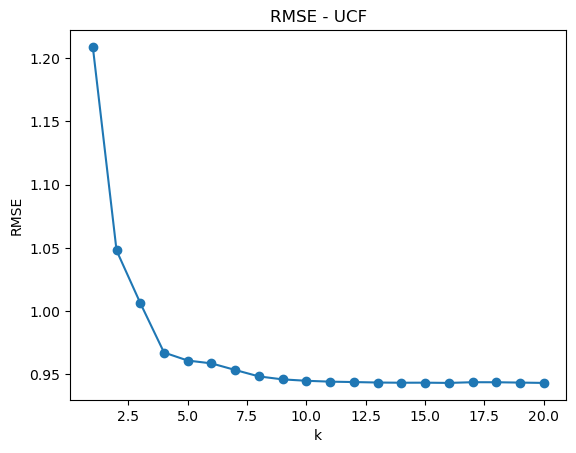

In [18]:
k_values = list(range(1, 21))
rmse_values_ucf = []

for k_value in k_values:
    predictions = []
    
    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = ucf_predict(u, c, R, k_value)
        predictions.append(prediction)

    actual_ratings = test_data['overall'].values

    rmse = calculate_rmse(actual_ratings, np.array(predictions))
    rmse_values_ucf.append(rmse)
    
# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ŒΩ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices = np.argsort(rmse_values_ucf)

best_k = sorted_indices[0]+1
min_rmse_ucf = rmse_values_ucf[sorted_indices[0]]

print("œÑŒø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k:", best_k)
print("ŒºŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [UCF]:", min_rmse_ucf)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k
plt.plot(k_values, rmse_values_ucf, marker='o')
plt.title('RMSE - UCF')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

<span style="font-size: 18px;">**Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ**</span></br>
Œ†Œ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ ŒºŒØŒ± Œ±ŒπœÉŒ∏Œ∑œÑŒÆ œÄœÑœéœÉŒ∑ œÑŒøœÖ RMSE. Œ†ŒπŒø Œ≠ŒΩœÑŒøŒΩŒ∑ œÄœÑœéœÉŒ∑ œÜŒ±ŒØŒΩŒµœÑŒ±Œπ œÉœÑŒ∑ŒΩ Œ±œÅœáŒÆ œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑœåœÇ ŒºŒ±œÇ, Œ±ŒªŒªŒ¨ ŒºŒµœÑŒ¨ Œ±œÄœå Œ≠ŒΩŒ± Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± ŒµœÄŒ≠œÅœáŒµœÑŒ±Œπ ŒπœÉœÉŒøœÅŒøœÄŒØŒ±. ŒëœÖœÑœå œÉŒ∑ŒºŒ±ŒØŒΩŒµŒπ œåœÑŒπ œÄŒµœÅŒØœÄŒøœÖ œÉœÑŒø k=10, Œ≠œáŒøœÖŒºŒµ œÜœÑŒ¨œÉŒµŒπ œÉœÑŒø "œåœÅŒπŒø" Œ∫Œ±Œπ Œ±œÄœå ŒµŒ∫ŒµŒØ Œ∫Œ±Œπ œÄŒ≠œÅŒ± Œ¥ŒµŒΩ Œ∏Œ± Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ≠œÇ Œ¥ŒπŒ±œÜŒøœÅŒ≠œÇ, Œ¨œÅŒ± Œ¥ŒµŒΩ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ ŒΩŒ± œÑŒø œÑœÅŒ≠ŒæŒøœÖŒºŒµ Œ≥ŒπŒ± ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ k. ŒëœÖœÑœå ŒºœÄŒøœÅŒµŒØ ŒΩŒ± ŒøœÜŒµŒØŒªŒµœÑŒ±Œπ œÉœÑŒø œåœÑŒπ œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± ŒºŒ±œÇ Œ≠œáŒøœÖŒΩ ŒºŒ≠œáœÅŒπ œÄŒµœÅŒØœÄŒøœÖ 10 œåŒºŒøŒπŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø Œ∫Œ±Œπ Œ±œÄœå ŒµŒ∫ŒµŒØ Œ∫Œ±Œπ œÄŒ≠œÅŒ± ŒºœÄŒ±ŒØŒΩŒøœÖŒºŒµ œÉœÑŒ∑ŒΩ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œåœÄŒøœÖ Œ¥ŒµŒΩ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± œÄŒ¨œÅŒøœÖŒºŒµ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒøœÖœÇ œåŒºŒøŒπŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ Œ∫Œ±Œπ Œ±ŒΩŒ±Œ≥Œ∫Œ±œÉœÑŒπŒ∫Œ¨ œÑŒøœÖœÇ œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ œåŒªŒøœÖœÇ(Œ±ŒªŒªŒ¨ Œ±œÖœÑŒøŒØ Œ∏Œ± ŒµŒØŒΩŒ±Œπ <~10 œÉœÑŒπœÇ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒµœÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ).

---
*Œ†Œ¨ŒªŒπ ŒµŒ¥œé œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒøœÖŒºŒµ Œ≠ŒΩŒ± ŒºŒπŒ∫œÅœåœÑŒµœÅŒø œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ± Œ≥ŒπŒ± ŒΩŒ± ŒµŒªŒ≠Œ≥ŒæŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒøœÅŒ∏œåœÑŒ∑œÑŒ± œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ œÄŒøœÖ œÜœÑŒπŒ¨ŒæŒ±ŒºŒµ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ, Œ∫Œ±Œπ ŒΩŒ± œÄŒ±œÅŒøœÖœÉŒπŒ¨œÉŒøœÖŒºŒµ œÑŒøŒΩ œÑœÅœåœÄŒø œÉŒ∫Œ≠œàŒ∑œÇ ŒºŒøœÖ.</br>
ŒîŒµŒΩ ŒµŒØŒΩŒ±Œπ ŒøŒªœåŒ∫ŒªŒ∑œÅŒ∑ Œ∑ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑, Œ±ŒªŒªŒ¨ Œ≠ŒΩŒ± Œ±œÅœáŒπŒ∫œå Œ∫ŒøŒºŒºŒ¨œÑŒπ ŒºœåŒΩŒø(Œ≥ŒπŒ±œÑŒØ œÑŒø œÖœÄœåŒªŒøŒπœÄŒø, Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒøœçœÉŒµ ŒºŒπŒ± œÄŒ±œÅœåŒºŒøŒπŒ± ŒªŒøŒ≥ŒπŒ∫ŒÆ œÄŒøœÖ ŒµŒØœáŒ±ŒºŒµ Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒÆœÉŒµŒπ Œ∫Œ±Œπ œÉœÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ≤ŒÆŒºŒ±œÑŒ±)*</br>
<span style="font-size: 12px;">*!Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ œÖœÄŒøœáœÅŒµœâœÑŒπŒ∫œå ŒΩŒ± œÑŒø œÑœÅŒ≠ŒæŒøœÖŒºŒµ!*</span>

In [19]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÄŒªŒ±ŒπœÉŒØŒøœÖ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ Œ≥ŒπŒ± œÑŒø train set
train_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user1', 'user1', 'user2', 'user3', 'user3', 'user1'],
    'asin': ['phone1', 'phone2', 'phone3', 'phone1', 'phone1', 'phone3', 'phone4'],
    'overall': [4, 5, 3, 3, 2, 1, 4]
})

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÄŒªŒ±ŒπœÉŒØŒøœÖ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ Œ≥ŒπŒ± œÑŒø test set
test_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user2', 'user3'],
    'asin': ['phone1', 'phone1', 'phone4'],
    'overall': [4, 3, 4]
})

print(train_data_2)
print()

# ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆ Œ±œÅŒ±ŒπŒøœç œÄŒØŒΩŒ±Œ∫Œ± R
users_2 = train_data_2['reviewerID'].unique()
cellphones_2 = train_data_2['asin'].unique()

user_mapping_2 = {user_2: i for i, user_2 in enumerate(users_2)}
print(user_mapping_2)
cellphone_mapping_2 = {cellphone_2: i for i, cellphone_2 in enumerate(cellphones_2)}
print(cellphone_mapping_2)

num_users_2 = len(users_2)
num_cellphones_2 = len(cellphones_2)

R_2 = np.zeros((num_users_2, num_cellphones_2))

for index, row in train_data_2.iterrows():
    uu = user_mapping_2[row['reviewerID']]
    cc = cellphone_mapping_2[row['asin']]
    rating_2 = row['overall']
    R_2[uu, cc] = rating_2

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ Œ±œÅœáŒπŒ∫Œøœç œÄŒØŒΩŒ±Œ∫Œ±
print()
print("Initial (R_2):")
print(R_2)
print()

  reviewerID    asin  overall
0      user1  phone1        4
1      user1  phone2        5
2      user1  phone3        3
3      user2  phone1        3
4      user3  phone1        2
5      user3  phone3        1
6      user1  phone4        4

{'user1': 0, 'user2': 1, 'user3': 2}
{'phone1': 0, 'phone2': 1, 'phone3': 2, 'phone4': 3}

Initial (R_2):
[[4. 5. 3. 4.]
 [3. 0. 0. 0.]
 [2. 0. 1. 0.]]



In [20]:
item_2=2#
# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item_2
users_rated_item_2 = np.nonzero(R_2[:, item_2])[0]
print(users_rated_item_2)

user_2=1#
# Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±
user_similarity_2 = cosine_similarity(R_2)
print(user_similarity_2)
uu = user_similarity_2[user_2] # mas endiaferei autos o user_2
print(uu)

k_2=2#
# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ k_2 œÄŒπŒø œåŒºŒøŒπŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ
u_k_2 = uu[users_rated_item_2]
print(u_k_2)
print(np.argsort(uu[users_rated_item_2])[-k_2:])
print(users_rated_item_2[np.argsort(uu[users_rated_item_2])[-k_2:]])


[0 2]
[[1.         0.49236596 0.60553007]
 [0.49236596 1.         0.89442719]
 [0.60553007 0.89442719 1.        ]]
[0.49236596 1.         0.89442719]
[0.49236596 0.89442719]
[0 1]
[0 2]


*œÑŒ≠ŒªŒøœÇ œÄŒ±œÅŒ±Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒøœÇ*

---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 5**</span>

Œ§Œø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k: 6
ŒúŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [ICF]: 0.9217044869514532


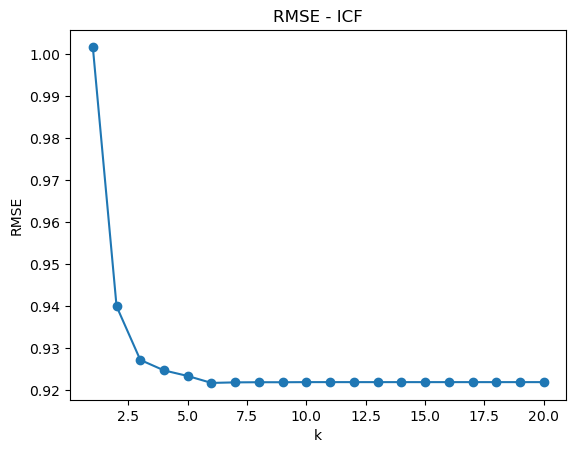

In [21]:
def icf_predict(user, item, R, k):
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒ± œÄŒøœÖ Œ≠œáŒµŒπ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ Œø œáœÅŒÆœÉœÑŒ∑œÇ
    items_rated_by_user = np.nonzero(R[user, :])[0]

    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±
    item_similarity = cosine_similarity(np.transpose(R))
    c = item_similarity[item]  # ŒúŒ±œÇ ŒµŒΩŒ¥ŒπŒ±œÜŒ≠œÅŒµŒπ Œ±œÖœÑŒÆ Œ∑ œÉŒµŒπœÅŒ¨, œÄŒøœÖ œÄœÅŒ±Œ∫œÑŒπŒ∫Œ¨ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø

    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒ± k œÄŒπŒø œåŒºŒøŒπŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒ±
    c_k = items_rated_by_user[np.argsort(c[items_rated_by_user])[-k:]]

    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ œÄœÅœåŒ≤ŒªŒµœàŒ∑ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ ŒµŒæŒØœÉœâœÉŒ∑ œÄŒøœÖ ŒºŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ
    ar = np.sum(item_similarity[item, c_k] * R[user, c_k])
    par = np.sum(np.abs(item_similarity[item, c_k]))
    if par != 0:
        prediction = ar / par
    else:
        prediction = 0

    # ŒöŒ¨ŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ± clipping œÉœÑŒø ŒµœçœÅŒøœÇ [0, 5] œÉŒµ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøœÖ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ
    prediction = np.clip(prediction, 0, 5)

    return prediction

# Œ§œÅŒ≠ŒæŒπŒºŒø œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ Œ≥ŒπŒ± k Œ±œÄœå 1 Œ≠œâœÇ 20
k_values = list(range(1, 21))
rmse_values_icf = []

for k_value in k_values:
    predictions = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = icf_predict(u, c, R, k_value)
        predictions.append(prediction)

    actual_ratings = test_data['overall'].values

    rmse = calculate_rmse(actual_ratings, np.array(predictions))
    rmse_values_icf.append(rmse)

# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices_icf = np.argsort(rmse_values_icf)

best_k_icf = sorted_indices_icf[0] + 1
min_rmse_icf = rmse_values_icf[sorted_indices_icf[0]]

print("Œ§Œø ŒíŒ≠ŒªœÑŒπœÉœÑŒø k:", best_k_icf)
print("ŒúŒµ ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [ICF]:", min_rmse_icf)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k
plt.plot(k_values, rmse_values_icf, marker='o')
plt.title('RMSE - ICF')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()


<span style="font-size: 18px;">**Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ**</span></br>
Œ†Œ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ ŒºŒØŒ± Œ±ŒπœÉŒ∏Œ∑œÑŒÆ œÄœÑœéœÉŒ∑ œÑŒøœÖ RMSE. Œ†ŒπŒø Œ≠ŒΩœÑŒøŒΩŒ∑ œÄœÑœéœÉŒ∑ œÜŒ±ŒØŒΩŒµœÑŒ±Œπ œÉœÑŒ∑ŒΩ Œ±œÅœáŒÆ œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑœåœÇ ŒºŒ±œÇ, Œ±ŒªŒªŒ¨ ŒºŒµœÑŒ¨ Œ±œÄœå Œ≠ŒΩŒ± Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± ŒµœÄŒ≠œÅœáŒµœÑŒ±Œπ ŒπœÉœÉŒøœÅŒøœÄŒØŒ±. ŒëœÖœÑœå œÉŒ∑ŒºŒ±ŒØŒΩŒµŒπ œåœÑŒπ œÄŒµœÅŒØœÄŒøœÖ œÉœÑŒø k=6, Œ≠œáŒøœÖŒºŒµ œÜœÑŒ¨œÉŒµŒπ œÉœÑŒø "œåœÅŒπŒø" Œ∫Œ±Œπ Œ±œÄœå ŒµŒ∫ŒµŒØ Œ∫Œ±Œπ œÄŒ≠œÅŒ± Œ¥ŒµŒΩ Œ∏Œ± Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ≠œÇ Œ¥ŒπŒ±œÜŒøœÅŒ≠œÇ, Œ¨œÅŒ± Œ¥ŒµŒΩ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ ŒΩŒ± œÑŒø œÑœÅŒ≠ŒæŒøœÖŒºŒµ Œ≥ŒπŒ± ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ k. ŒëœÖœÑœå ŒøœÜŒµŒØŒªŒµœÑŒ±Œπ Œ≥ŒπŒ± œÑŒøŒΩ œÄŒ±œÅœåŒºŒøŒπŒø ŒªœåŒ≥œâ œÄŒøœÖ ŒµŒØœÄŒ±ŒºŒµ Œ∫Œ±Œπ œÉœÑŒøŒΩ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø.

---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 6**</span>

In [45]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

*! ŒîŒπŒ±œÅŒ∫ŒµŒØ œÄŒµœÅŒØœÄŒøœÖ 2-3 ŒªŒµœÄœÑŒ¨ Œ≥ŒπŒ± ŒΩŒ± œÑœÅŒ≠ŒæŒµŒπ !*

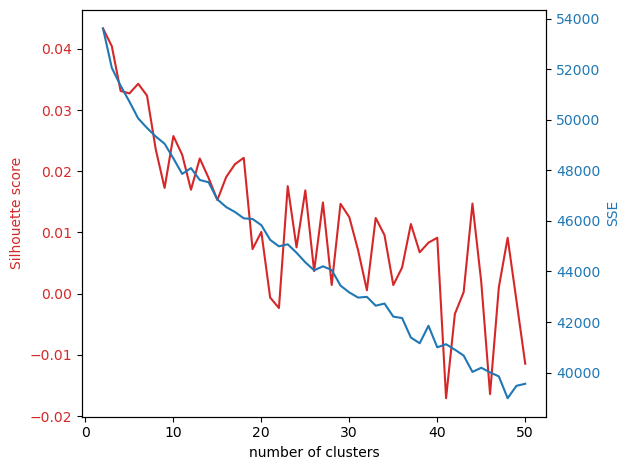

In [47]:
error = np.zeros(51)
sh_score = np.zeros(51)
for k in range(1,51):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    kmeans.fit_predict(R)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(R, kmeans.labels_)
        
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

`Œ†Œ°ŒüŒ£ŒüŒßŒó` ŒøŒπ œÑŒπŒºŒ≠œÇ Œ±œÖœÑŒ≠œÇ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒΩ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±. ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ ŒªŒøŒ≥ŒπŒ∫œå Œ∫Œ±Œπ Œ±ŒΩŒ±ŒºŒµŒΩœåŒºŒµŒΩŒø Œ±œÜŒøœç Œø k-means Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒµŒπ Œ∏Œ± Œ∫Œ±œÑŒ±ŒªŒÆŒæŒµŒπ ŒºŒµ ŒªŒØŒ≥Œø Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±, Œ±œÜŒøœç Œ∑ Œ±œÅœáŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÑœâŒΩ Œ∫Œ≠ŒΩœÑœÅœâŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ œÑœÖœáŒ±ŒØŒ± Œ∫Œ±Œπ œÉŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ œÉŒ∑ŒºŒµŒØŒ± Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨.</br></br>
**ŒëœÄœå œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ≥œÅŒ¨œÜŒ∑ŒºŒ±, ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± œÄŒøœçŒºŒµ œåœÑŒπ Œ≠ŒΩŒ±œÇ "œÉœâœÉœÑœåœÇ" Œ±œÅŒπŒ∏ŒºœåœÇ Œ±œÄœå clusters ŒµŒØŒΩŒ±Œπ Œø 18.**</br>
Œ¨ŒªŒªŒøŒπ œÉœáœÑŒπŒ∫Œ¨ "œÉœâœÉœÑŒøŒØ" Œ±œÅŒπŒ∏ŒºŒøŒØ œÜŒ±ŒØŒΩŒøŒΩœÑŒ±Œπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ ŒøŒπ: 29, 32, 36, 40, 36, **44** Œ∫Œ±Œπ **49**.</br>
ŒöŒ±œÑŒ±ŒªŒÆŒæŒ±ŒºŒµ œåŒºœâœÇ œÉŒµ Œ±œÖœÑœåŒΩ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå *[k=18]* Œ≥ŒπŒ±œÑŒØ œÉŒµ ŒµŒ∫ŒµŒØŒΩŒø œÑŒø œÉŒ∑ŒºŒµŒØŒø:
1. <span style="color: #C30010;">œÉœÑŒø Silhouette score œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ Œ≠ŒΩŒ± Œ≠ŒΩœÑŒøŒΩŒø peak *[Œ∫œÖœÅŒØœâœÇ Œ±œÖœÑœå]*</span>
2. <span style="color: #006CA5;">œÉœÑŒø SSE œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ ŒºŒπŒ± œÑŒπŒºŒÆ œÄŒøœÖ Œ≠œáŒµŒπ ŒºŒµŒπœâŒ∏ŒµŒØ Œ±ŒπœÉŒ∏Œ∑œÑŒ¨</span>

In [48]:
def cluster_average(user, item, R, cluster_labels):
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø cluster œÉœÑŒø ŒøœÄŒøŒØŒø Œ±ŒΩŒÆŒ∫ŒµŒπ Œø œáœÅŒÆœÉœÑŒ∑œÇ
    user_cluster = cluster_labels[user]
    
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒ± indices œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø ŒØŒ¥ŒπŒø cluster ŒºŒµ œÑŒøŒΩ œáœÅŒÆœÉœÑŒ∑ user
    users_in_cluster = np.where(cluster_labels == user_cluster)[0] #g [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
    
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item
    users_rated_item = np.nonzero(R[:, item])[0]

    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø ŒØŒ¥ŒπŒø cluster ŒöŒëŒô Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item
    users_rated_item_in_cluster = np.intersect1d(users_in_cluster, users_rated_item)
    
    if len(users_rated_item_in_cluster) > 0:
        # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒºŒ≠œÉŒ∑œÇ œÑŒπŒºŒÆœÇ œÑœâŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ Œ≥ŒπŒ± œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item Œ±œÄœå œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÑŒøœÖ cluster œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ Œ±œÖœÑœå œÑŒø item
        cluster_avg_item_rating = np.mean(R[users_rated_item_in_cluster, item]) #R(g,c) [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
        return cluster_avg_item_rating #R(g,c)
    else:
        # ŒëŒΩ Œ¥ŒµŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ Œ≥ŒπŒ± œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item œÉœÑŒø cluster œÑœåœÑŒµ
        # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒºŒ≠œÉŒ∑ œÑŒπŒºŒÆ œÑœâŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ Œ≥ŒπŒ± œåŒªŒ± œÑŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒ± Œ±œÄœå œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÑŒøœÖ cluster
        # œáœÅŒÆœÉœÑŒµœÇ œÑŒøœÖ cluster(=Œ¥ŒµŒΩ Œ∏Œ± ŒªŒ¨Œ≤ŒøœÖŒºŒµ œÖœÄœåœàŒ∑ŒΩ ŒºŒ±œÇ œÑŒøœÖœÇ users œÄŒøœÖ Œ¥ŒµŒΩ ŒµœáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ Œ∫Œ¨œÄŒøŒπŒø item [Œ¥Œ∑Œª. ŒºŒµ 0 rating]
        # [ŒÑŒÑŒÑŒ≠œáŒøœÖŒºŒµ Œ∫Œ¨ŒΩŒµŒπ œÑŒ∑ŒΩ œÉœçŒºŒ≤Œ±œÉŒ∑ œåœÑŒπ œåœÄŒøœÖ rating=0 œÉŒ∑ŒºŒ±ŒØŒΩŒµŒπ œåœÑŒπŒø user Œ¥ŒµŒΩ Œ≠xŒµŒπ Œ∫Œ¨ŒΩŒµŒπ review, Œ∫Œ±Œπ œåœáŒπ œåœÑŒπ Œ≠œáŒµŒπ Œ∫Œ¨ŒΩŒµŒπ Œ∫Œ±Œ∫œå  review Œ≤Œ¨Œ∂ŒøŒΩœÑŒ±œÇ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒ± 0]
        # Œ†Œ°ŒüŒ£ŒüŒßŒó!!! Œ∑ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÉœçŒºŒ≤œÉŒ∑ Œ≠œáŒµŒπ Œ≥ŒØŒΩŒµŒπ Œ∫Œ±Œπ œÉœÑŒ± œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩŒ± Œ≤ŒÆŒºŒ±œÑŒ± !!!
        cluster_avg_rating = np.mean(R[users_in_cluster, :][R[users_in_cluster, :] > 0]) #R(g) [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
        return cluster_avg_rating #R(g)


In [50]:
# ŒïœÄŒπŒªŒøŒ≥ŒÆ œÑŒøœÖ "œÉœâœÉœÑŒøœç" Œ±œÅŒπŒ∏ŒºŒøœç clusters
optimal_k = 18

# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ k-means ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ ŒºŒµ œÑŒøŒΩ Œ≤Œ≠ŒªœÑŒπœÉœÑŒø Œ±œÅŒπŒ∏Œºœå clusters
best_kmeans_model = sk_cluster.KMeans(init='k-means++', n_clusters=optimal_k)
cluster_labels = best_kmeans_model.fit_predict(R)

# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ œÑŒøœÖ Cluster-Average (CA) Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ
predictions_ca = []

for index, row in test_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]
    
    prediction = cluster_average(u, c, R, cluster_labels)
    predictions_ca.append(prediction)

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± œÑŒøŒΩ Cluster-Average (CA) Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø
actual_ratings = test_data['overall'].values
rmse_ca = calculate_rmse(actual_ratings, np.array(predictions_ca))

print("ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters:", optimal_k)
print("RMSE [CA]:", rmse_ca)


ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters: 18
RMSE [CA]: 0.7800935763473554


`Œ†Œ°ŒüŒ£ŒüŒßŒó` Œ∫Œ±Œπ Œ±œÖœÑŒÆ ŒµŒ¥œé Œ∑ œÑŒπŒºŒÆ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒµŒπ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±ŒΩ, œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÑŒøŒΩ ŒØŒ¥ŒπŒø ŒªœåŒ≥œâ.

**ŒïŒ∫œÑœåœÇ Œ±œÄœå œÑŒø  ŒΩŒ± ŒµŒæŒµœÑŒ¨œÉŒøœÖŒºŒµ ŒºœåŒΩŒø œÑŒ∑ŒΩ œÄœÅœåŒ≤ŒªŒµœàŒ∑ Œ≥ŒπŒ± k=18 ("œÉœâœÉœÑœåœÇ" # clusters),</br>
œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ Œ∏Œ± Œ¥ŒøŒ∫ŒπŒºŒ¨œÉŒøœÖŒºŒµ Œ∫Œ±Œπ Œ¨ŒªŒªŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ ùëò *[=Œ±œÄœå 2 Œ≠œâœÇ 60]* Œ≥ŒπŒ± ŒΩŒ± Œ¥ŒøœçŒºŒµ Œ±ŒΩ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ≤ŒµŒªœÑŒπœéœÉŒøœÖŒºŒµ œÑŒ∑ŒΩ Œ±œÄœåŒ¥ŒøœÉŒ∑ œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ.**</br>
</br>
*! ŒîŒπŒ±œÅŒ∫ŒµŒØ œÄŒµœÅŒØœÄŒøœÖ 2-3 ŒªŒµœÄœÑŒ¨ Œ≥ŒπŒ± ŒΩŒ± œÑœÅŒ≠ŒæŒµŒπ œåŒªŒø Œ±œÖœÑœå, Œ≥ŒπŒ±œÑŒØ Œ≠œáŒøœÖŒºŒµ Œ≤Œ¨ŒªŒµŒπ Œ≠ŒΩŒ± Œ±œÅŒ∫ŒµœÑŒ¨ ŒºŒµŒ≥Œ¨ŒªŒø ŒµœçœÅŒøœÇ Œ≥ŒπŒ± œÑŒπœÇ k œÑŒπŒºŒ≠œÇ, œÉŒµ œÉœÖŒΩŒ¥ŒπŒ±œÉŒºœå œåœÑŒπ œÉŒµ Œ∫Œ¨Œ∏Œµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫œå k œÑœÅŒ≠œáŒµŒπ œÑŒø k-means Œ∫Œ±Œπ œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ Œ∫Œ±Œπ œÑŒπœÇ ŒºŒ≠œÉŒµœÇ œÑŒπŒºŒ≠œÇ !*

ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters: 46
ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CA]: 0.5882835576031508


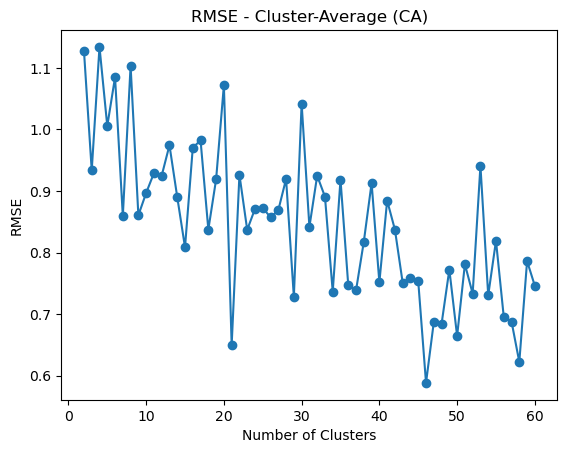

In [56]:
# ŒîŒøŒ∫ŒπŒºŒÆ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫œéŒΩ œÑŒπŒºœéŒΩ Œ≥ŒπŒ± œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ clusters
k_values_additional = list(range(2, 61))
rmse_values_ca_additional = []
actual_ratings = test_data['overall'].values

for k in range(2, 61):
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average(u, c, R, additional_cluster_labels)
        predictions_ca_additional.append(prediction)

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± œÑŒøŒΩ Cluster-Average (CA) Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ca_additional.append(rmse_ca_additional)
    
# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices_clusters = np.argsort(rmse_values_ca_additional)

best_k_clusters = sorted_indices_clusters[0]+2
min_rmse_clusters = rmse_values_ca_additional[sorted_indices_clusters[0]]

print("ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters:", best_k_clusters)
print("ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CA]:", min_rmse_clusters)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ clusters
plt.plot(k_values_additional, rmse_values_ca_additional, marker='o')
plt.title('RMSE - Cluster-Average (CA)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()


`Œ†Œ°ŒüŒ£ŒüŒßŒó` ŒøŒπ œÑŒπŒºŒ≠œÇ Œ±œÖœÑŒ≠œÇ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒΩ Œ∫Œ±Œπ ŒµŒ¥œé Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±, œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÑŒøŒΩ ŒØŒ¥ŒπŒø ŒªœåŒ≥œâ.</br></br>
**Œ£œÑŒø ŒµœçœÅŒøœÇ 2 Œ≠œâœÇ 50(Œ≠ŒΩŒ± Œ∫ŒøŒºŒºŒ¨œÑŒπ Œ±œÄœå œÑŒø œÄŒ±ŒªŒπœå ŒºŒ±œÇ ŒµœçœÅŒøœÇ) œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ œÑŒµŒªŒπŒ∫Œ¨ œÄŒπŒø "œÉœâœÉœÑœå" k Œ≥ŒπŒ± Œ±œÅŒπŒ∏Œºœå cluster ŒµŒØŒΩŒ±Œπ œÑŒø 46, Œ±œÜŒøœç ŒµŒ∫ŒµŒØ œÄŒ±œÅŒ±œÑŒ∑œÅŒµŒØœÑŒ±Œπ œÑŒø œÄŒπŒø œáŒ±ŒºŒ∑Œªœå RMSE.**</br>
ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ Œ±ŒΩŒ±ŒºŒµŒΩœåŒºŒµŒΩŒø, ŒΩŒ± ŒºŒ∑ŒΩ Œ≤Œ≥ŒµŒπ ŒæŒ±ŒΩŒ± "œÉœâœÉœÑŒÆ" œÑŒπŒºŒÆ œÑŒø 18, Œ≥ŒπŒ±œÑŒØ ŒæŒ±ŒΩŒ± œÑœÅŒ≠ŒæŒ±ŒºŒµ œÑŒøŒΩ k-means Œ∫Œ±Œπ œåœÄœâœÇ ŒµŒØŒΩŒ±Œπ Œ≥ŒºœâœÉœÑœå Œø k-means Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒ±ŒØœÅŒΩŒµŒπ Œ¥ŒπŒ±œÜœÅŒµœÑŒπŒ∫Œ≠œÇ Œ±œÅœáŒπŒ∫ŒøœÄŒøŒπŒÆœÉŒµŒπœÇ Œ∫Œ≠ŒΩœÑœÅœâŒΩ, œÄŒøœÖ Œ±œÖœÑœå Œ∫Œ±œÑŒ±ŒªŒÆŒ≥ŒµŒπ œÉŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±, œåœÄœâœÇ Œ≠œáŒøœÖŒºŒµ ŒæŒ±ŒΩŒ± Œ±ŒΩŒ±œÜŒ≠œÅŒµŒπ Œ∫Œ±Œπ œÄŒπŒø œÄŒ¨ŒΩœâ.</br></br>
**ŒïœÄŒØœÉŒ∑œÇ œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ œÉœÑŒø Œ∫Œ±ŒπŒΩŒøœçœÅŒ≥ŒπŒø ŒºŒ±œÇ ŒµœçœÅŒøœÇ(51-60) (Œ±ŒªŒªŒ¨ Œ∫Œ±Œπ Œ≥ŒµŒΩŒπŒ∫Œ¨) œåœÑŒπ Œ≠œáŒøœÖŒºŒµ ŒºŒπŒ± ŒºŒπŒ∫œÅŒÆ 'ŒºŒ≠œÉŒ∑' œÄœÑœéœÉŒ∑ œÉœÑŒπœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒø RMSE. ŒíŒ¨Œ∂ŒøœÖŒºŒµ œÑŒøŒΩ œåœÅŒø 'ŒºŒ≠œÉŒ∑' œÄœÑœéœÉŒ∑ Œ≥ŒπŒ±œÑŒØ œÉœÑŒ∑ŒΩ Œ≥œÅŒ±œÜŒπŒ∫ŒÆ ŒºŒ±œÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑ œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒΩœÑŒ±Œπ œÉœÖŒΩŒµœáŒµŒØœÇ Œ±ŒΩœåŒ¥ŒøœÖœÇ Œ∫Œ±Œπ Œ∫Œ±Œ∏œåŒ¥ŒøœÖœÇ(œÉŒ±ŒΩ 'Œ∫Œ±œÅŒ¥ŒπŒøŒ≥œÅŒ¨œÜŒ∑ŒºŒ±'). ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ ŒªŒøŒ≥ŒπŒ∫œå, Œ±œÜŒøœç Œø k-meas ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒØ Œ±œÅŒ∫ŒµœÑŒ¨ œÑœÖœáŒ±ŒØŒ± Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨(Œ¥Œ∑Œª. Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑŒøŒΩ œÑœÅŒ≠œáŒøœÖŒºŒµ, œÄŒøœÖ œÉœÑŒ∑ŒΩ œÄŒµœÅŒØœÄœÑœâœÉŒÆ ŒºŒ±œÇ œÑŒøŒΩ Œ∫Œ±ŒªŒøœçŒºŒµ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ Œ∏Œ≠ŒªŒøœÖŒºŒµ ŒΩŒ± Œ±ŒªŒªŒ¨ŒæŒøœÖŒºŒµ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå Œ±œÄœå clusters)</br>
ŒëŒ°Œë, ŒµŒ∫ŒµŒØ œÄŒøœÖ Œ∏Œ≠Œªœâ ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒÆŒæœâ ŒµŒØŒΩŒ±Œπ œåœÑŒπ Œ±ŒΩ œÑœÅŒ≠ŒæŒøœÖŒºŒµ Œ±œÖœÑœå œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± Œ±œÅŒ∫ŒµœÑŒ≠œÇ œÜŒøœÅŒ≠œÇ Œ∫Œ±Œπ œÖœÄŒøŒªŒøŒ≥ŒØœÉŒøœÖŒºŒµ œÑŒøŒΩ ŒºŒ≠œÉŒø œåœÅŒø, ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå Œ±œÄœå cluster, œÑœåœÑŒµ ŒØœÉœâœÇ Œ¥ŒøœçŒºŒµ ŒºŒØŒ± ŒºŒπŒ∫œÅŒÆ œÄœÑœéœÉŒ∑ œÉœÑŒπœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ RMSE.</br></br>**
ŒëœÖœÑŒÆ Œ∑ ŒªŒøŒ≥ŒπŒ∫ŒÆ ŒπœÉœáœçŒµŒπ Œ∫Œ±Œπ Œ≥ŒπŒ± œÑŒ± ŒµœÄœåŒºŒµŒΩŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒ± œÄŒøœÖ Œ∏Œ± Œ¥ŒøœçŒºŒµ œÉœÑŒø Œ∫ŒøŒºŒºŒ¨œÑŒπ œÑŒøœÖ 'bonus'.

---
<span style="font-size: 20px;">**Bonus**</span></br></br>
ŒïŒ¥œé Œ±ŒΩœÑŒØ ŒΩŒ± ŒµœÜŒ±œÅŒºœåœÉŒøœÖŒºŒµ œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø œÄŒøœÖ Œ±œÜŒøœÅŒøœçœÉŒµ œÑŒ∑ŒΩ `ŒúŒ≠œÉŒ∑ Œ§ŒπŒºŒÆ`, Œ∏Œ± ŒµœÜŒ±œÅŒºœåœÉŒøœÖŒºŒµ œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø `UCF`. ŒòŒ± ŒµœÅŒ≥Œ±œÉœÑŒøœçŒºŒµ ŒºŒµ œÑŒ∑ŒΩ ŒØŒ¥ŒπŒ± ŒªŒøŒ≥ŒπŒ∫ŒÆ œÄŒøœÖ ŒµœÅŒ≥Œ±œÉœÑŒÆŒ∫Œ±ŒºŒµ Œ∫Œ±Œπ œÉœÑŒ∑ŒΩ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œ±ŒªŒªŒ¨ Œ∫Œ±Œπ œÉœÑŒ∑ŒΩ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒøœÖ **ŒíŒÆŒºŒ±œÑŒøœÇ 4**.</br></br>
*! ŒîŒπŒ±œÅŒ∫ŒµŒØ Œ∫Œ±Œπ Œ±œÖœÑœå œÄŒµœÅŒØœÄŒøœÖ 2-3 ŒªŒµœÄœÑŒ¨ œÑŒø Œ∫Œ¨Œ∏Œµ block(ŒµŒ∫œÑœåœÇ Œ±œÄœå œÑŒø 1Œø) Œ≥ŒπŒ± ŒΩŒ± œÑœÅŒ≠ŒæŒµŒπ !*</br></br>
ŒòŒ± œÑŒø œÑœÅŒ≠ŒæŒøœÖŒºŒµ Œ≥ŒπŒ± œÑœÅŒµŒπœÇ Œ¥ŒπŒ±œÜŒøœÅœÑŒπŒ∫Œ≠œÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ (Œ≥ŒπŒ± **k=5**<span style="font-size: 10px;">(œÉœÑŒø 2Œø block)</span>, **k=2**<span style="font-size: 10px;">(œÉœÑŒø 3Œø block)</span>, **k=10**<span style="font-size: 10px;">(œÉœÑŒø 4Œø block)</span>)

In [38]:
def cluster_average_ucf(user, item, R, cluster_labels, k):
    
    # ............. Œ§Œü ŒöŒüŒúŒúŒëŒ§Œô ŒëŒ†Œü Œ§Œü "ŒíŒóŒúŒë 6" Œ†ŒüŒ• Œ•ŒõŒüŒ†ŒüŒôŒóŒ£ŒëŒúŒï Œ†ŒëŒ°ŒëŒ†ŒùŒ© ............. #
    
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø cluster œÉœÑŒø ŒøœÄŒøŒØŒø Œ±ŒΩŒÆŒ∫ŒµŒπ Œø œáœÅŒÆœÉœÑŒ∑œÇ
    user_cluster = cluster_labels[user]
    
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒ± indices œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø ŒØŒ¥ŒπŒø cluster ŒºŒµ œÑŒøŒΩ œáœÅŒÆœÉœÑŒ∑ user
    users_in_cluster = np.where(cluster_labels == user_cluster)[0] #g [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
    
    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item
    users_rated_item = np.nonzero(R[:, item])[0]

    # ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø ŒØŒ¥ŒπŒø cluster ŒöŒëŒô Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒÆœÉŒµŒπ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item
    users_rated_item_in_cluster = np.intersect1d(users_in_cluster, users_rated_item)
    
    if len(users_rated_item_in_cluster) > 0:
        # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒºŒ≠œÉŒ∑œÇ œÑŒπŒºŒÆœÇ œÑœâŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒπœéŒΩ Œ≥ŒπŒ± œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item Œ±œÄœå œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÑŒøœÖ cluster œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ Œ±œÖœÑœå œÑŒø item
        cluster_avg_item_rating = np.mean(R[users_rated_item_in_cluster, item]) #R(g,c) [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
        
    else:
        # ŒëŒΩ Œ¥ŒµŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ Œ≥ŒπŒ± œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø item œÉœÑŒø cluster œÑœåœÑŒµ
        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # Œ£œÑŒø pdf Œ¥ŒµŒΩ ŒºŒ±œÇ ŒªŒ≠ŒµŒπ Œ±Œ∫œÅŒπŒ≤œéœÇ œÄœâœÇ ŒΩŒ± œáŒµŒπœÅŒπœÉœÑŒøœçŒºŒµ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ œÄŒµœÅŒØœÄœÑœâœÉŒ∑,
        # Œ¨œÅŒ± Œ¥ŒµŒΩ ŒæŒ≠œÅœâ Œ±ŒΩ ŒµŒØŒΩŒ±Œπ œÄŒøŒªœç œÉœâœÉœÑŒÆ Œ±œÖœÑŒÆ Œ∑ Œ±œÄœåœÜŒ±œÉŒ∑, Œ±ŒªŒªŒ¨ Œ≤Œ≥Œ¨Œ∂ŒµŒπ ŒΩœåŒ∑ŒºŒ±
        # ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ≤Œ¨ŒªŒøœÖŒºŒµ Œ∫Œ¨œÑŒπ œÑŒ≠œÑŒøŒπŒø "cluster_avg_item_rating = 0" Œ±ŒΩ Œ¥ŒµŒΩ Œ∏Œ≠ŒªŒøœÖŒºŒµ Œ±œÖœÑœå
        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        cluster_avg_item_rating = np.mean(R[users_in_cluster, :][R[users_in_cluster, :] > 0]) #R(g) [Œ±œÄœå œÑŒπœÇ ŒøŒ¥Œ∑Œ≥ŒØŒµœÇ œÑŒøœÖ pdf œÄŒøœÖ ŒºŒ±œÇ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ]
        
        
    # ............. Œ†ŒïŒ°ŒôŒ†ŒüŒ• Œ§Œü ŒöŒüŒúŒúŒëŒ§Œô ŒëŒ†Œü Œ§Œü "ŒíŒóŒúŒë 4" Œ†ŒüŒ• Œ•ŒõŒüŒ†ŒüŒôŒóŒ£ŒëŒúŒï Œ§Œü UCF ............. #
    
    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ ŒºŒµœÑŒ±Œæœç œÑŒøœÖ œáœÅŒÆœÉœÑŒ∑ user Œ∫Œ±Œπ œÑœâŒΩ clusters
    user_similarity = cosine_similarity(R[user, np.newaxis], R[users_in_cluster, :])[0]

    # ŒïœÄŒπŒªŒøŒ≥ŒÆ œÑœâŒΩ k œÄŒπŒø œåŒºŒøŒπœâŒΩ clusters
    top_k_clusters = np.argsort(user_similarity)[-k:]

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÑŒ∑œÇ œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ ŒµŒæŒØœÉœâœÉŒ∑ œÑŒøœÖ UCF Œ≥ŒπŒ± œÑŒ± ŒµœÄŒπŒªŒµŒ≥ŒºŒ≠ŒΩŒ± clusters
    # Œ±ŒΩœÑŒØ ŒΩŒ± œÑŒø œÄŒøŒªŒªŒ±œÄŒªŒ±œÉŒπŒ¨Œ∂Œ±ŒºŒµ ŒºŒµ œÑŒø Œ∫Œ±ŒΩŒøŒΩŒπŒ∫œå R[u',c] œåœÄœâœÇ œÉœÑŒ∑ŒΩ œÄŒ±ŒªŒπŒ¨ ŒºŒ±œÇ ŒµŒæŒØœÉœâœÉŒ∑,
    # œÑœéœÅŒ± œÑŒø œÄŒøŒªŒªŒ±œÄŒªŒ±œÉŒπŒ¨Œ∂ŒøœÖŒºŒµ ŒºŒµ Œ±œÖœÑœå œÄŒøœÖ ŒµŒØœáŒ±ŒºŒµ Œ≤œÅŒµŒπ œÉœÑŒø "ŒíŒÆŒºŒ± 6", œÑŒø R[g,c]
    ar = np.sum(user_similarity[top_k_clusters] * cluster_avg_item_rating)
    par = np.sum(np.abs(user_similarity[top_k_clusters]))

    if par != 0:
        prediction = ar / par
    else:
        prediction = 0

    # ŒöŒ¨ŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ± clipping œÉœÑŒø ŒµœçœÅŒøœÇ [0, 5] œÉŒµ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøœÖ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ
    prediction = np.clip(prediction, 0, 5)

    return prediction

ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters: 55
ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]: 0.582023080399945


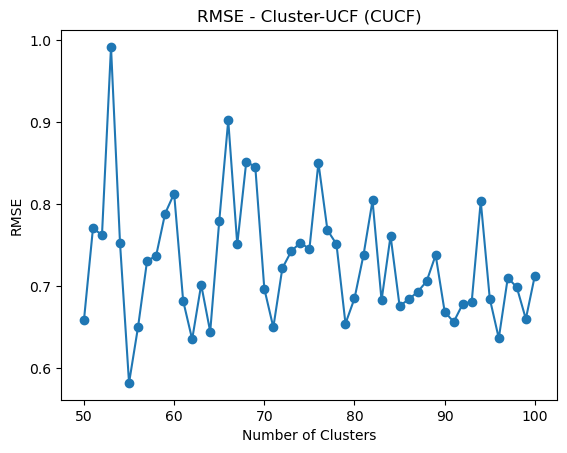

In [57]:
# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ œÑŒøœÖ UCF Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ ŒºŒµ œÑŒ∑ œáœÅŒÆœÉŒ∑ œÑŒøœÖ cluster-item œÄŒØŒΩŒ±Œ∫Œ± Œ≥ŒπŒ± Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ k Œ±œÄœå 50 Œ≠œâœÇ 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± 5 œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster
K_num_of_same_users = 5 #(Œ±ŒªŒªŒ¨Œ∂ŒøŒΩœÑŒ±œÇ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ±ŒªŒªŒ¨ŒæŒøœÖŒºŒµ œÑŒø œÄœåœÉŒ± œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± œÑŒøŒΩ Cluster-Average-UCF (CAUCF) Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters:", best_k_ucf_clusters)
print("ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]:", min_rmse_ucf_clusters)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k Œ≥ŒπŒ± œÑŒøŒΩ UCF Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒºŒµ œáœÅŒÆœÉŒ∑ cluster-item œÄŒØŒΩŒ±Œ∫Œ±
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`Œ†Œ°ŒüŒ£ŒüŒßŒó` ŒøŒπ œÑŒπŒºŒ≠œÇ Œ±œÖœÑŒ≠œÇ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒΩ Œ∫Œ±Œπ ŒµŒ¥œé Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±, œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÑŒøŒΩ ŒØŒ¥ŒπŒø ŒªœåŒ≥œâ.</br></br>
*ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± **5** œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster*</br></br>
**Œ£œÑŒø ŒµœçœÅœâœÇ [50-100] œÄŒøœÖ ŒµŒæŒµœÑŒ¨Œ∂ŒøœÖŒºŒµ, œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ Œ∑ ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œÑŒπŒºŒÆ Œ≥ŒπŒ± œÑŒø RMSE ŒµŒØŒΩŒ±Œπ œÉœÑŒø 55.**</br>
**ŒìŒµŒΩŒπŒ∫Œ¨ œåœÉŒø Œø Œ±œÅŒπŒ∏ŒºœåœÇ œÑŒøŒΩ clusters Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ, Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ ŒΩŒ± Œ≠œáŒµŒπ ŒµœÄŒ≠ŒªŒ∏ŒµŒπ ŒºŒØŒ± ŒπœÉœÉŒøœÅŒøœÄŒØŒ±, ŒºŒµ ŒØœÉœâœÇ ŒºŒπŒ± ŒºŒπŒ∫œÅŒÆ œÄœÑœéœÉŒ∑ œÉœÑŒøŒΩ ŒºŒ≠œÉŒø œåœÅŒø œÑœâŒΩ œÑŒπŒºœéŒΩ, œåŒºœâœÇ œÉŒµ Œ∫Œ±ŒºŒØŒ± œÄŒµœÅŒØœÄœÑœâœÉŒ∑ Œ¥ŒµŒΩ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± ŒºŒπŒªŒÆœÉŒøœÖŒºŒµ Œ≥ŒπŒ± Œ∫Œ¨œÄŒøŒπŒ± œÉœÑŒ±Œ∏ŒµœÅŒÆ œÄŒøœÅŒµŒØŒ± œÑœâŒΩ œÑŒπŒºœéŒΩ œÑŒøœÖ RMSE Œ∫Œ±Œ∏œéœÇ Œ±œÖŒæŒ¨ŒΩŒøœÖŒºŒµ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ clusters.**</br>
ŒåœÑŒ±ŒΩ ŒªŒ≠œâ ŒπœÉœÉŒøœÅŒøœÄŒØŒ± Œ¥ŒµŒΩ ŒµŒΩŒΩŒøœé œåœÑŒπ Œ≤ŒªŒ≠œÄœâ ŒºŒπŒ± ŒµœÖŒ∏ŒµŒØŒ± Œ≥œÅŒ±ŒºŒºŒÆ œÄŒ±Œ±œÅŒ¨ŒªŒªŒ∑ŒªŒ∑ ŒºŒµ œÑŒøŒΩ x'x, Œ±ŒªŒªŒ¨ Œ≤ŒªŒ≠œÄœâ œÑŒπœÇ œÑŒπŒºŒ≠œÇ ŒΩŒ± ŒµŒØŒΩŒ±Œπ Œ≥œçœÅœâ Œ±œÄœå œÑŒø ~0.7.</br>
ŒëŒΩ Œ≤Œ¨ŒªŒøœÖŒºŒµ Œ¨ŒªŒªŒµœÇ œÑŒπŒºŒ≠œÇ œÉœÑŒ∑ŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ *K_num_of_same_users* ŒºœÄŒøœÅŒµŒØ ŒΩŒ± Œ≠œÅŒ∏ŒøœÖŒºŒµ Œ±ŒΩœÑŒπŒºŒ≠œÑœâœÄŒøŒπ ŒºŒµ Œ¨ŒªŒªŒµœÇ œÑŒπŒºŒ≠œÇ.</br>

ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters: 84
ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]: 0.587540860173646


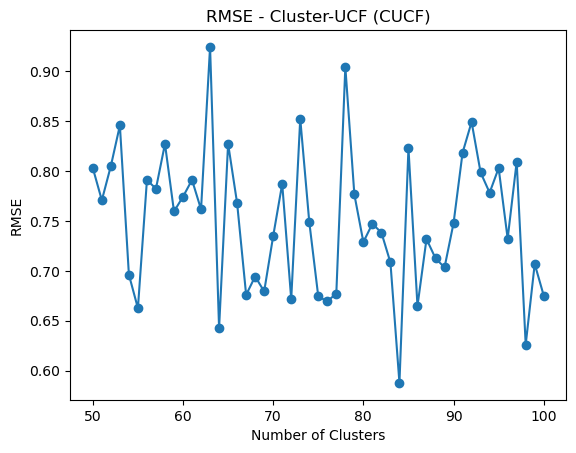

In [58]:
# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ œÑŒøœÖ UCF Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ ŒºŒµ œÑŒ∑ œáœÅŒÆœÉŒ∑ œÑŒøœÖ cluster-item œÄŒØŒΩŒ±Œ∫Œ± Œ≥ŒπŒ± Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ k Œ±œÄœå 50 Œ≠œâœÇ 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± 2 œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster
K_num_of_same_users = 2 #(Œ±ŒªŒªŒ¨Œ∂ŒøŒΩœÑŒ±œÇ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ±ŒªŒªŒ¨ŒæŒøœÖŒºŒµ œÑŒø œÄœåœÉŒ± œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± œÑŒøŒΩ Cluster-Average-UCF (CAUCF) Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters:", best_k_ucf_clusters)
print("ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]:", min_rmse_ucf_clusters)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k Œ≥ŒπŒ± œÑŒøŒΩ UCF Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒºŒµ œáœÅŒÆœÉŒ∑ cluster-item œÄŒØŒΩŒ±Œ∫Œ±
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`Œ†Œ°ŒüŒ£ŒüŒßŒó` ŒøŒπ œÑŒπŒºŒ≠œÇ Œ±œÖœÑŒ≠œÇ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒΩ Œ∫Œ±Œπ ŒµŒ¥œé Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±, œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÑŒøŒΩ ŒØŒ¥ŒπŒø ŒªœåŒ≥œâ.</br></br>
*ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± **2** œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster*</br></br>
**Œ£œÑŒø ŒµœçœÅœâœÇ [50-100] œÄŒøœÖ ŒµŒæŒµœÑŒ¨Œ∂ŒøœÖŒºŒµ, œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ Œ∑ ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œÑŒπŒºŒÆ Œ≥ŒπŒ± œÑŒø RMSE ŒµŒØŒΩŒ±Œπ œÉœÑŒø 84.**</br>
**ŒöŒ±Œπ ŒµŒ¥œé ŒºŒøŒπŒ¨Œ∂ŒµŒπ œÄœâœÇ œåœÉŒø Œø Œ±œÅŒπŒ∏ŒºœåœÇ œÑŒøŒΩ clusters Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ, ŒºŒµŒπœéŒΩŒµœÑŒ±Œπ ŒªŒØŒ≥Œø Œ∫Œ±œÑŒ¨ ŒºŒ≠œÉŒø œåœÅŒø œÑŒø RMSE. ŒëŒªŒªŒ¨ œÄŒ¨ŒªŒπ ŒµŒΩŒΩŒøŒµŒØœÑŒ±Œπ Œ¥ŒµŒΩ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ ŒºŒπŒ± œÉœÑŒ±Œ∏ŒµœÅŒÆ œÄŒøœÅŒµŒØŒ±, Œ±ŒªŒªŒ¨ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œÉœÖŒΩŒµœáŒµŒØœÇ Œ±ŒªŒªŒ±Œ≥Œ≠œÇ œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ ŒºŒµ œÉœÖŒΩŒµœáŒ≠ŒπœÇ Œ±ŒΩŒøŒ¥ŒπŒ∫Œ≠œÇ Œ∫Œ±Œπ Œ∫Œ±Œ∏ŒøŒ¥ŒπŒ∫Œ≠œÇ Œ∫Œ±œÑŒµœÖŒ∏œçŒΩœÉŒµŒπœÇ**</br>

ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters: 81
ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]: 0.5818488410480259


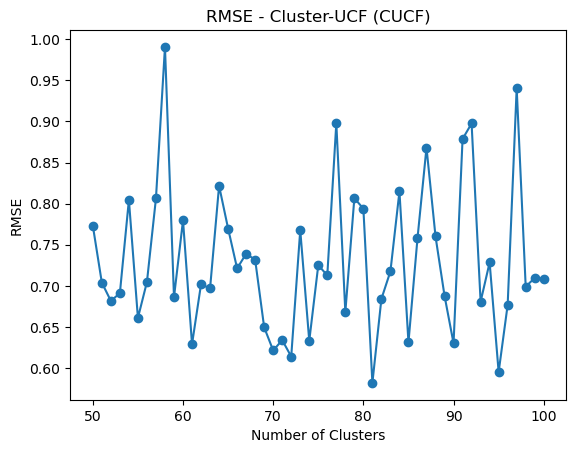

In [59]:
# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ œÑŒøœÖ UCF Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ ŒºŒµ œÑŒ∑ œáœÅŒÆœÉŒ∑ œÑŒøœÖ cluster-item œÄŒØŒΩŒ±Œ∫Œ± Œ≥ŒπŒ± Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ k Œ±œÄœå 50 Œ≠œâœÇ 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± 10 œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster
K_num_of_same_users = 10 #(Œ±ŒªŒªŒ¨Œ∂ŒøŒΩœÑŒ±œÇ Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ±ŒªŒªŒ¨ŒæŒøœÖŒºŒµ œÑŒø œÄœåœÉŒ± œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ RMSE Œ≥ŒπŒ± œÑŒøŒΩ Cluster-Average-UCF (CAUCF) Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# ŒíœÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø k œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ œÉœÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø RMSE ŒºŒµ œÑŒ∑ Œ≤ŒøŒÆŒ∏ŒµŒπŒ± œÑŒ∑œÇ argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("ŒíŒ≠ŒªœÑŒπœÉœÑŒøœÇ Œ±œÅŒπŒ∏ŒºœåœÇ clusters:", best_k_ucf_clusters)
print("ŒïŒªŒ¨œáŒπœÉœÑŒø RMSE [CUCF]:", min_rmse_ucf_clusters)

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ Œ≥œÅŒ±œÜŒπŒ∫ŒÆœÇ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑œÇ RMSE œâœÇ œÄœÅŒøœÇ œÑŒø k Œ≥ŒπŒ± œÑŒøŒΩ UCF Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒºŒµ œáœÅŒÆœÉŒ∑ cluster-item œÄŒØŒΩŒ±Œ∫Œ±
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`Œ†Œ°ŒüŒ£ŒüŒßŒó` ŒøŒπ œÑŒπŒºŒ≠œÇ Œ±œÖœÑŒ≠œÇ Œ∏Œ± Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒΩ Œ∫Œ±Œπ ŒµŒ¥œé Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÄŒøœÖ œÑœÅŒ≠œáŒøœÖŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄœÅœåŒ≥œÅŒ±ŒºŒºŒ±, œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÑŒøŒΩ ŒØŒ¥ŒπŒø ŒªœåŒ≥œâ.</br></br>
*ŒöœÅŒ±œÑŒ¨ŒºŒµ œÑŒ± **10** œÄŒπŒø œåŒºŒøŒπŒ± Œ∂ŒµœÖŒ≥Œ¨œÅŒπŒ± user-cluster*</br></br>
**Œ†Œ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œÄŒ±œÅœåŒºŒøŒπŒ± œÄœÅŒ¨Œ≥ŒºŒ±œÑŒ± ŒºŒµ œÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ.**</br></br>
ŒëœÄœå ŒµŒ¥œé œÑœÖœáŒ±ŒØŒΩŒµŒπ ŒΩŒ± œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ œÑŒø ŒºŒπŒ∫œÅœåœÑŒµœÅŒø RMSE Œ≥ŒπŒ± œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø **CUCF**!

---
<span style="font-size: 25px;">**ŒíŒÆŒºŒ± 7**</span>

**ŒàœáŒøœÖŒºŒµ œÉœÖŒ≥Œ∫ŒµŒΩœÑœéœÉŒµŒπ œÉŒµ Œ≠ŒΩŒ±ŒΩ œÄŒØŒΩŒ±Œ∫Œ±, œåŒªŒ± œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± RMSE Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± œÄŒøœÖ Œ≠Œ≤Œ≥Œ±ŒªŒµ Œø Œ∫Œ¨Œ∏Œµ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ œÄŒøœÖ œÖŒªŒøœÄŒøŒπŒÆœÉŒ±ŒºŒµ:**

| ŒëŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ                                           | ŒöŒ±ŒªœçœÑŒµœÅŒø RMSE       |
|------------------------------------------------------|---------------------|
| User Agerage **(UA)**                                | 0.5397865558697561  |
| Item Average **(IA)**                                | 0.5138120657943773  |
| Singular Value Decomposition **(SVD)**               | 4.585271738477795   |
| UserBased Collaborative Filtering **(UCF)**          | 0.9432925865043249  |
| ItemBased Collaborative Filtering **(ICF)**          | 0.9217044869514532  |
| Cluster-Average **(CA)**                             | 0.5882835576031508  |
| Cluster-UserBased Collaborative Filtering **(CUCF)** | 0.5818488410480259  |

**Œ†Œ±œÅŒ±Œ∫Œ¨œÑœâ, Œ≥ŒπŒ± ŒªœåŒ≥ŒøœÖœÇ Œ∫Œ±ŒªœçœÑŒµœÅŒ∑œÇ ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑œÇ, œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒµœÑŒ±Œπ Œ∫Œ±Œπ Œ≠ŒΩŒ± Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÄŒøœÖ Œ≠œáŒøœÖŒºŒµ œåŒªŒøœÖœÇ œÑŒøœÖœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÖœÇ œÄŒøœÖ œÖŒªŒøœÄŒøŒπŒÆœÉŒ±ŒºŒµ, œÑŒ±ŒæŒπŒΩŒøŒºŒ∑ŒºŒ≠ŒΩŒøœÖœÇ Œ∫Œ±œÑŒ± Œ±œçŒæŒøŒΩœÑŒ± Œ±œÅŒπŒ∏Œºœå œÉŒµ œÉœáŒ≠œÉŒ∑ ŒºŒµ œÑŒø ŒºŒπŒ∫œÅœåœÅœÑŒµœÅŒø RMSE œÄŒøœÖ ŒµŒØœáŒ±ŒΩ.**

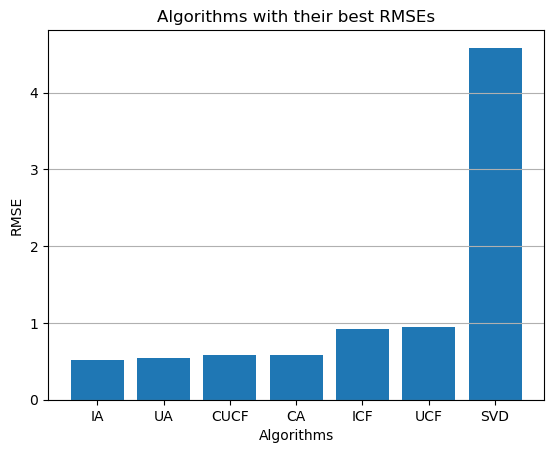

In [60]:
import matplotlib.pyplot as plt

algorithms = ['UA', 'IA', 'SVD', 'UCF', 'ICF', 'CA', 'CUCF']
RMSE = [0.5397865558697561, 0.5138120657943773, 4.585271738477795, 0.9432925865043249, 0.9217044869514532, 0.5882835576031508, 0.5818488410480259]

# Œ¶œÑŒπŒ¨œáŒΩŒøœÖŒºŒµ œÑŒ∑ŒΩ œÉŒµŒπœÅŒ¨, Œ±œÄœå œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒºŒµ œÑŒø ŒºŒπŒ∫œÅœåœÑŒµœÅŒø RMSE œÄœÅŒøœÇ œÑŒø ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒø
sorted_indices = sorted(range(len(RMSE)), key=lambda k: RMSE[k])
sorted_algorithms = [algorithms[i] for i in sorted_indices]
sorted_RMSE = [RMSE[i] for i in sorted_indices]

plt.bar(sorted_algorithms, sorted_RMSE)

plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('Algorithms with their best RMSEs')
plt.grid(axis='y')
plt.show()


<span style="font-size: 19px;">**Œ†ŒëŒ°ŒëŒ§ŒóŒ°ŒôŒ£ŒïŒôŒ£**</span></br>

---

ŒîŒπŒ±Œ∫œÅŒØŒΩŒøœÖŒºŒµ 3 ŒºŒµŒ≥Œ¨ŒªŒµœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒµœÇ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ:</br>
* <span style="font-size: 16px;">ŒøŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ œÄŒøœÖ ŒµŒØœáŒ±ŒΩ **<u>Œ∫Œ±ŒªŒÆ</u>** œÄœÅŒøœÉŒ≠Œ≥Œ∫ŒπœÉŒ∑ (RMSE < 1) Œ∫Œ±Œπ Œ±œÖœÑŒøŒØ ŒøŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ ŒµŒØŒΩŒ±Œπ ŒøŒπ:</span></br>
</br> `Item Average (IA)` : Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒºŒµ œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±. ŒàŒΩŒ±œÇ Œ±œÄŒªœåœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ, œáœâœÅŒØœÇ ŒπŒ¥ŒπŒ±ŒØœÑŒµœÅŒ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±, œÄŒøœÖ ŒµŒ∫ŒºŒµœÑŒ±ŒªŒ≠Œ≤ŒµœÑŒ±Œπ œÑŒøŒΩ ŒºŒ≠œÉŒø œåœÅŒø œÑœâŒΩ Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒµœâŒΩ œÄŒøœÖ Œ≠œáŒµŒπ ŒªŒ¨Œ≤ŒµŒπ Œ∫Œ¨Œ∏Œµ Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒΩŒø. </br>
</br> `User Agerage (UA)` : Œ≠ŒΩŒ±œÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒØŒ¥ŒπŒ±œÇ œÜŒπŒªŒøœÉŒøœÜŒØŒ±œÇ ŒºŒµ œÑŒøŒΩ (IA). Œó Œ¥ŒπŒ±œÜŒøœÅŒ¨ œÑŒøœÖ ŒµŒØŒΩŒ±Œπ œåœÑŒπ Œ±œÖœÑœåœÇ ŒµŒ∫ŒºŒµœÑŒ±ŒªŒ≠Œ≤ŒµœÑŒ±Œπ œÑŒøŒΩ ŒºŒ≠œÉŒø œåœÅŒø œÑœâŒΩ Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒµœâŒΩ œÄŒøœÖ Œ≠œáŒµŒπ Œ∫Œ¨ŒΩŒµŒπ Œø Œ∫Œ¨Œ∏Œµ œáœÅŒÆœÉœÑŒ∑œÇ.</br>
</br>ŒâœÑŒ±ŒΩ œÄŒπŒ∏Œ±ŒΩœå Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ (IA) ŒΩŒ± Œ≠œáŒµŒπ ŒªŒØŒ≥Œø ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œÑŒπŒºŒÆ Œ±œÄœå œÑŒøŒΩ (UA), Œ±œÜŒøœç ŒøŒπ Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒµŒπœÇ œÄŒøœÖ Œ≠œáŒµŒπ Œ∫Œ¨ŒΩŒµŒπ Œø ŒµŒ∫Œ¨œÉœÑŒøœÑŒµ œáœÅŒÆœÉœÑŒ∑œÇ ŒµœÄŒπœÅœÅŒµŒ¨Œ∂ŒøŒΩœÑŒ±Œπ Œ¨ŒºŒµœÉŒ± Œ±œÄœå œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒΩŒø œÄŒøœÖ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒµŒØ, Œ∫Œ±Œπ œåœáŒπ œÑœåœÉŒø œÄŒøŒªœç Œ±œÄœå œÑŒøŒΩ "œáŒ±œÅŒ±Œ∫œÑŒÆœÅŒ±" œÑŒøœÖ œáœÅŒÆœÉœÑŒ∑. ŒîŒ∑ŒªŒ±Œ¥ŒÆ Œ∑ ŒºŒ≠œÉŒ∑ œÑŒπŒºŒÆ ŒµœÖŒΩŒøŒµŒØ ŒªŒØŒ≥Œø œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø, Œ±œÜŒøœç œÉœÑŒ∑ŒΩ œÑŒµŒªŒπŒ∫ŒÆ Œ±œÖœÑœå Œ±ŒæŒπŒøŒªŒøŒ≥ŒøœçŒºŒµ.</br>
</br> `Cluster-UserBased Collaborative Filtering (CUCF)` : ŒµŒØŒΩŒ±Œπ œÄŒµœÅŒØœÄŒøœÖ Œø œÉœÖŒΩŒ¥ŒπŒ±œÉŒºœåœÇ œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ (CA) Œ∫Œ±Œπ (UCF). ŒîŒ∑ŒªŒ±Œ¥ŒÆ, œÉœÖŒΩŒ¥ŒπŒ¨Œ∂ŒµŒπ œÑŒ± œÄŒªŒµŒøŒΩŒµŒ∫œÑŒÆŒºŒ±œÑŒ± œÑŒ∑œÇ ŒøŒºŒ±Œ¥ŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Œ±œÄœå œÑŒøŒΩ (CA) ŒºŒµ œÑŒ± œÄŒªŒµŒøŒΩŒµŒ∫œÑŒÆŒºŒ±œÑŒ± œÑŒ∑œÇ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑œÇ œÑŒ∑œÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ±œÇ (UCF), Œ∫Œ±Œπ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œåœÑŒπ ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒØ ŒªŒØŒ≥Œø Œ∫Œ±ŒªœçœÑŒµœÅŒ± Œ±œÄœå œÑŒøŒΩ (CA) Œ∫Œ±Œπ Œ±œÅŒ∫ŒµœÑŒ¨ Œ∫Œ±ŒªœçœÑŒµœÅŒ± Œ±œÄœå œÑŒøŒΩ (UCF).</br>
</br> `Cluster-Average (CA)` : Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ œÄŒøœÖ ŒºŒ≠œÉŒ± Œ±œÄœå œÑŒøŒΩ Œ¥ŒπŒ±œáœâœÅŒπœÉŒºœå œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ œÉŒµ ŒøŒºŒ¨Œ¥ŒµœÇ, œÄŒµœÑœÖœáŒ±ŒØŒΩŒµŒπ œÑŒØŒºŒπŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±.Œ†ŒπŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒ±, ŒøŒπ ŒøŒºŒ¨Œ¥ŒµœÇ Œ±œÖœÑŒ≠œÇ Œ±œÄŒøœÑŒµŒªŒøœçŒΩœÑŒ±Œπ Œ±œÄœå œáœÅŒÆœÉœÑŒµœÇ ŒºŒµ œÄŒ±œÅœåŒºŒøŒπŒ± œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨-Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒπŒµœÇ, Œ¥Œ∑Œª. ŒºŒµ œÄŒ±œÅœåŒºŒøŒπŒµœÇ œÄœÅŒøœÑŒπŒºŒÆœÉŒµŒπœÇ, Œ∫Œ±Œπ Œ¨œÅŒ± Œø ŒºŒ≠œÉŒøœÇ œåœÅŒøœÇ œÑŒ∑œÇ Œ±ŒæŒπŒøŒªœåŒ≥Œ∑œÉŒ∑œÇ ŒµŒΩœåœÇ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ Œ±œÄœå Œ±œÖœÑŒÆŒΩ œÑŒ∑ŒΩ ŒøŒºŒ¨Œ¥Œ± œáœÅŒ∑œÉœÑœéŒΩ, ŒºœÄŒøœÅŒµŒØ ŒΩŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒµŒπ ŒºŒØŒ± Œ∫Œ±ŒªŒÆ œÄœÅœåŒ≤ŒªŒµœàŒ∑.</br>
</br>ŒëœÖœÑŒøŒØ ŒøŒπ Œ¥œçŒø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ, Œø (CUCF) Œ∫Œ±Œπ Œø (CA), Œ¥ŒµŒΩ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± œÄŒøœçŒºŒµ œåœÑŒπ Œ≠œáŒøœÖŒΩ œÄŒøŒªœç ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ¥ŒπŒ±œÜŒøœÅŒ¨ œÉœÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± œÑŒøœÖ RMSE. ŒëœÖœÑœå ŒøœÜŒµŒØŒªŒµœÑŒ±Œπ Œ∫Œ±Œπ œÉŒµ Œ≠ŒΩŒ±ŒΩ ŒºŒµŒ≥Œ¨ŒªŒø Œ≤Œ±Œ∏Œºœå, œÉœÑŒπœÇ œÄŒøŒªŒªŒ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ œÄŒøœÖ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± œÄŒ¨œÅŒµŒπ œÑŒø Œ∫Œ±Œ∏Œ≠ŒΩŒ±, Œ±ŒªŒªŒ¨ ŒµŒπŒ¥ŒπŒ∫Œ¨ Œø (CUCF) œÄŒøœÖ Œ≠œáŒµŒπ œÑŒ∑ŒΩ œÄŒ±œÅŒ¨ŒºŒµœÑœÅŒø Œ≥ŒπŒ± œÑŒø œÄœåœÉŒ± œÄŒØŒø œåŒºŒøŒπŒ± Œ∏Œ≠ŒªŒøœÖŒºŒµ ŒΩŒ± Œ∫œÅŒ±œÑŒÆœÉŒøœÖŒºŒµ, Œ∫Œ±Œπ Œ¥ŒµŒΩ ŒºœÄŒøœÅŒøœçŒΩ ŒΩŒ± ŒµŒªŒµŒ≥ŒΩœáœÑŒøœçŒΩ œåŒªŒµœÇ ŒøŒπ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ.</br>
</br> `ItemBased Collaborative Filtering (ICF)` : ŒµŒØŒΩŒ±Œπ Œ≠ŒΩŒ±œÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ œÄŒøœÖ ŒµŒæŒµœÑŒ¨Œ∂ŒµŒπ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ± ŒºŒµœÑŒ±Œæœç œÑœâŒΩ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩœâŒΩ. ŒåœáŒπ œåŒºœâœÇ œåŒªœâŒΩ œÑœâŒΩ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩœâŒΩ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨, Œ±ŒªŒªŒ¨ Œ≠ŒΩŒ± œÖœÄŒøœÉœçŒΩŒøŒªŒø ŒºŒµ œÑŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒ± œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ±ŒæŒπŒøŒªŒøŒ≥Œ∑Œ∏ŒµŒØ(Œ∏Œ± œÑŒø Œ±ŒΩŒ±ŒªœçœÉŒøœÖŒºŒµ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÉœÑŒø UCF).</br>
</br> `UserBased Collaborative Filtering (UCF)` : Œ≠ŒΩŒ±œÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒØŒ¥ŒπŒ±œÇ œÜŒπŒªŒøœÉŒøœÜŒØŒ±œÇ ŒºŒµ œÑŒøŒΩ (ICF). Œó Œ¥ŒπŒ±œÜŒøœÅŒ¨ œÑŒøœÖ ŒµŒØŒΩŒ±Œπ œåœÑŒπ Œ±œÖœÑœåœÇ ŒµŒæŒµœÑŒ¨Œ∂ŒµŒπ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ± ŒºŒµœÑŒ±Œæœç œÑœâŒΩ œáœÅŒ∑œÉœÑœéŒΩ.</br>
ŒëŒæŒØŒ∂ŒµŒπ ŒΩŒ± œÉŒ∑ŒºŒµŒπœâŒ∏ŒµŒØ œåœÑŒπ œÉœÑŒøŒΩ (UCF), Œø œáœÅŒÆœÉœÑŒ∑œÇ Œ∏Œ± ŒµŒæŒµœÑŒ¨œÉŒµŒπ œÑŒ∑ŒΩ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ¨ œÑŒøœÖ ŒºœåŒΩŒø ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒøœÖœÇ Œ¨ŒªŒªŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø, Œ∫Œ±Œπ Œ¥ŒµŒΩ Œ∏Œ± ŒªŒ¨Œ≤ŒµŒπ œÖœÄœåœàŒ∑ŒΩ œÑŒøœÖ œÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ¥ŒµŒΩ Œ≠œáŒøœÖŒΩ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒø ŒØŒ¥ŒπŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø(Œ±ŒªŒªŒ¨ Œ∏Œ± ŒºœÄŒøœÅŒøœçœÉŒµ ŒΩŒ± ŒµŒØœáŒµ ŒºŒπŒ± Œ∫Œ±ŒªŒÆ ŒøŒºŒøŒπœåœÑŒ∑œÑŒ± Œ≤ŒªŒ≠œÄŒøŒΩœÑŒ±œÇ Œ∫Œ±Œπ œÑŒπœÇ Œ¨ŒªŒªŒµœÇ Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒµŒπœÇ œÑœâŒΩ œÖœÄœåŒªŒøŒπœÄœâŒΩ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩœâŒΩ)(ŒµŒ¥œé œÄŒ¨ŒªŒπ Œ≤Œ¨Œ∂ŒøœÖŒºŒµ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø œÑŒø Œ∫œÅŒπœÑŒØœÅŒπŒø œÑŒ±ŒπœÅŒπŒ¨œÉŒºŒ±œÑŒøœÇ "Œ≥ŒøœçœÉœÑŒøœÖ" Œ±ŒΩŒ¨ŒºŒµœÉŒ± œÉœÑŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ Œ∫Œ±Œπ œåœáŒπ œÑœåœÉŒø œÄŒøŒªœç œÑŒ∑ŒΩ "œÄŒøŒπœåœÑŒ∑œÑŒ±" œÑŒøœÖ ŒµŒ∫Œ¨œÉœÑŒøœÑŒµ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ œÄŒøœÖ ŒµŒæŒµœÑŒ¨Œ∂ŒøœÖŒºŒµ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨). ŒëœÖœÑœå œÄœÅŒøŒ∫Œ±ŒªŒµŒØ Œ≠ŒΩŒ± œÜŒπŒªœÑœÅŒ¨œÅŒπœÉŒºŒ± Œ∫Œ±Œπ Œ≠œáŒµŒπ œâœÇ Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± ŒΩŒ± Œ≠œáŒøœÖŒºŒµ œÄŒøŒªœç Œ∫Œ±ŒªœçœÑŒµœÅŒµœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÉœÑŒπœÇ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒµœÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ, Œ±ŒªŒªŒ¨ ŒºœÄŒøœÅŒµŒØ œÉŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ ŒµŒπŒ¥ŒπŒ∫Œ≠œÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ ŒΩŒ± œáŒ¨ŒΩŒøœÖŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ Œ∫Œ±ŒªŒ≠œÇ ŒøŒºŒøŒπœåœÑŒ∑œÑŒµœÇ Œ∫Œ±Œπ Œ∫Œ±œÑ' ŒµœÄŒ≠Œ∫œÑŒ±œÉŒ∑ Œ∫Œ¨œÄŒøŒπŒµœÇ Œ∫Œ±ŒªŒ≠œÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ. Œ†Œ±œÅœåŒºŒøŒπŒ± Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒØŒ± Œ∫Œ¨ŒΩŒµŒπ Œ∫Œ±Œπ Œø (ICF) Œ±ŒªŒªŒ¨ Œ±œÖœÑœåœÇ ŒµœÄŒπŒ∫ŒµŒΩœÑœÅœéŒΩŒµœÑŒ±Œπ œÉœÑŒ± œÄœÅŒøŒπœåŒΩœÑŒ±.</br>
</br>ŒâœÑŒ±ŒΩ œÄŒπŒ∏Œ±ŒΩœå Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ (ICF) ŒΩŒ± Œ≠œáŒµŒπ ŒªŒØŒ≥Œø ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œÑŒπŒºŒÆ Œ±œÄœå œÑŒøŒΩ (UCF), œÄŒ¨ŒªŒπ Œ≥ŒπŒ± œÄŒ±œÅœåŒºŒøŒπŒ± ŒªŒøŒ≥ŒπŒ∫ŒÆ œÄŒøœÖ ŒµŒØœáŒ±ŒºŒµ Œ¥ŒµŒπ Œ∫Œ±Œπ œÉœÑŒ∑ŒΩ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑ (IA)-(UA). Œü (UCF) œÄœÅŒøœÉœÄŒ±Œ∏ŒµŒØ ŒΩŒ± Œ≤œÅŒµŒπ œåŒºŒøŒπŒøœÖœÇ œáœÅŒÆœÉœÑŒµœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ œÄŒ±œÅœåŒºŒøŒπŒø "Œ≥ŒøœçœÉœÑŒø" Œ≤ŒªŒ≠œÄŒøŒΩœÑŒ±œÇ œÑŒøŒΩ Œ≥ŒµŒΩŒπŒ∫œå œÑœÅœåœÄŒø œÄŒøœÖ Œ±ŒæŒπŒøŒªŒøŒ≥ŒµŒØ Œ≠ŒΩŒ±œÇ œáœÅŒÆœÉœÑŒ∑œÇ ŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ¨ŒªŒªŒø, Œ±ŒªŒªŒ¨ Œ±œÖœÑœå Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ Œ±ŒΩœÑŒπœÄœÅŒøœÉœâœÄŒµœÖœÑŒπŒ∫œå Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒµŒΩŒπŒ∫ŒÆ Œ±ŒæŒπŒøŒªœåŒ≥ŒπœÉŒ∑ œÑŒøœÖ Œ±ŒΩœÑŒπŒ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ.</br>

</br>

---

* <span style="font-size: 16px;">ŒøŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ œÄŒøœÖ ŒµŒØœáŒ±ŒΩ **<u>Œ∫Œ±Œ∫ŒÆ</u>** œÄœÅŒøœÉŒ≠Œ≥Œ∫ŒπœÉŒ∑ (RMSE > 4.5) Œ∫Œ±Œπ Œ±œÖœÑœåœÇ Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒµŒØŒΩŒ±Œπ Œø:</span></br>
</br> `Singular Value Decomposition (SVD)` : Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒºŒµ œÑŒ± œáŒµŒπœÅœåœÑŒµœÅŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±. ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ ŒªŒøŒ≥ŒπŒ∫œå Œ±œÜŒøœç Œø œÄŒØŒΩŒ±Œ∫Œ±œÇ R œÄŒøœÖ œÜœÑŒπŒ¨ŒæŒ±ŒºŒµ ŒµŒØŒΩŒ±Œπ Œ≠ŒΩŒ±œÇ Œ±œÅŒ±ŒπœåœÇ œÄŒØŒΩŒ±Œ∫Œ±œÇ, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ ŒµŒØŒΩŒ±Œπ Œ≠ŒΩŒ±œÇ œÄŒØŒΩŒ±Œ∫Œ±œÇ ŒºŒµ œÄŒøŒªŒªŒ≠œÇ ŒºŒ∑Œ¥ŒµŒΩŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ. ŒëœÖœÑŒ≠œÇ ŒøŒπ œÑŒπŒºŒ≠œÇ Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ Œ≤Œ±Œ∏ŒºŒøŒªŒøŒ≥ŒØŒµœÇ œáœÅŒ∑œÉœÑœéŒΩ Œ≥ŒπŒ± Œ∫Œ¨œÄŒøŒπŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø, Œ±ŒªŒªŒ¨ Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºœåœÇ ŒºŒ±œÇ œÑŒπœÇ Œ≤ŒªŒ≠œÄŒµŒπ œâœÇ Œ±ŒæŒπŒøŒªŒøŒ≥ŒØœÉŒµŒπœÇ Œ∫Œ±Œπ Œ≥Œπ' Œ±œÖœÑœåŒΩ œÑŒøŒΩ ŒªœåŒ≥œâ Œ∫Œ±œÑŒ±ŒªŒÆŒ≥ŒµŒπ œÉŒµ ŒªŒ±ŒΩŒ∏Œ±œÉŒºŒ≠ŒΩŒµœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ.